In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.backends.backend_pdf import PdfPages
from itertools import cycle, islice




In [2]:

# Load the data from the Excel file
df_rating = pd.read_excel('rating_data.xlsx')
df_rating = df_rating.drop(['Name', 'Email', 'Start time', 'Completion time'], axis=1)

english_field_names = [name.split('|')[0] for name in df_rating.columns]

# Assign the new English field names back to the DataFrame
df_rating.columns = english_field_names

df_rating.info()
df_rating.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 42 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   ID                                                                                                              471 non-null    int64  
 1   Department                                                                                                      471 non-null    object 
 2   Proposition                                                                                                     471 non-null    object 
 3   Location                                                                                                        471 non-null    object 
 4   Seniority                                   

ID Department                                        Proposition  \
0   8       Fuji  Individual contributor with no direct report |...   
1  12    Everest  Individual contributor with no direct report |...   
2  15       Fuji  Individual contributor with no direct report |...   
3  29    Finance  Individual contributor with no direct report |...   
4  74    Everest  Individual contributor with no direct report |...   

                                           Location                 Seniority  \
0  Ho Chi Minh City Office | Văn phòng Hồ Chí Minh.  <=3 months | <= 3 tháng.   
1  Ho Chi Minh City Office | Văn phòng Hồ Chí Minh.  <=3 months | <= 3 tháng.   
2  Ho Chi Minh City Office | Văn phòng Hồ Chí Minh.  <=3 months | <= 3 tháng.   
3  Ho Chi Minh City Office | Văn phòng Hồ Chí Minh.  <=3 months | <= 3 tháng.   
4                 Ha Noi Office | Văn phòng Hà Nội.  <=3 months | <= 3 tháng.   

   My job scope is clear to me   \
0                             4   
1                             3   
2                             2   
3                             5   
4                             5   

   I know my priorities and I can focus on deliverables   \
0                                                  4       
1                                                  3       
2                                                  3       
3                                                  5       
4                                                  5       

   I have enough data and training to deliver my job   \
0                                                  3    
1                                                  3    
2                                                  3    
3                                                  3    
4                                                  2    

   I am well aware of the requirements for my career progression   \
0                                                  5                
1                                                  4                
2                                                  2                
3                                                  3                
4                                                  3                

   I have both flexibility and work-life balance   ...  \
0                                               5  ...   
1                                               3  ...   
2                                               5  ...   
3                                               2  ...   
4                                               5  ...   

   I believe DEK is continuously focused on improving customer experience and customer satisfaction   \
0                                                NaN                                                   
1                                                NaN                                                   
2                                                NaN                                                   
3                                                NaN                                                   
4                                                NaN                                                   

   I can openly express my opinion in DEK   \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   I have enough time to think about new ways of working and innovate   \
0                                                NaN                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   I have enough freedom to choose my way of doing my work   \


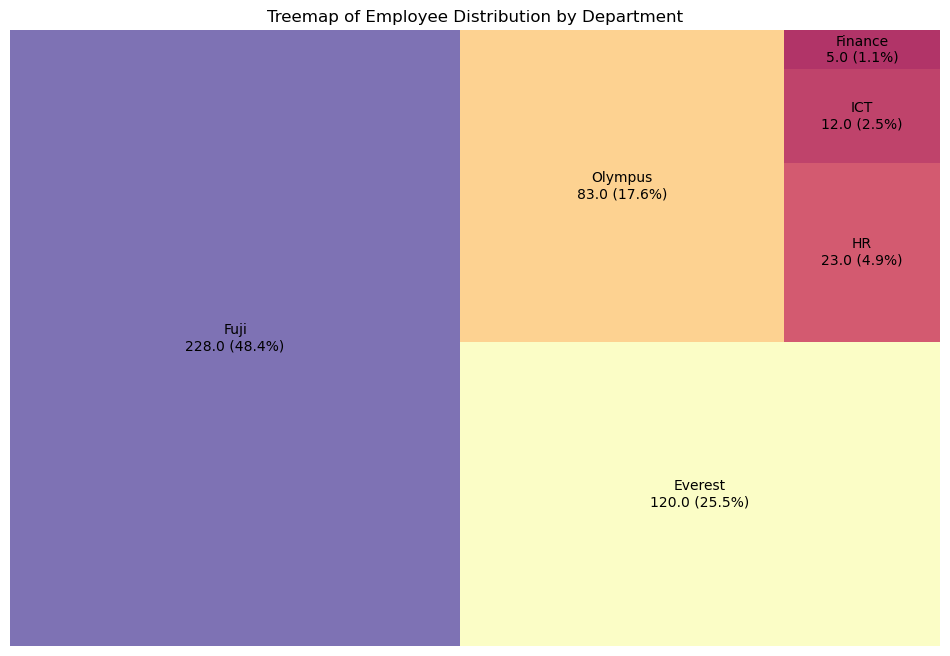

In [3]:
# Group by 'Department' and 'Seniority', then count the occurrences
df_population = df_rating.groupby(['Department', 'Seniority']).size().unstack()


# Calculate the total population per department (sum over rows)
sizes = df_population.sum(axis=1).sort_values(ascending=False)

# Calculate the total sum to compute proportions
total = sizes.sum()

# Create labels with both the size and proportion
labels = [f'{label}\n{size} ({size/total:.1%})' for label, size in zip(sizes.index, sizes)]

# Create a color palette
cmap = plt.cm.Spectral
mini = min(sizes)
maxi = max(sizes)
norm = plt.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

plt.axis('off')
plt.title('Treemap of Employee Distribution by Department')
plt.show()

In [4]:
# Define the question groups and their corresponding question indices
question_groups = {
    'Self - Employee': range(5, 15),  
    'Direct leader': range(15, 24),
    'Teammate': range(24, 29),
    'Work Environment': range(29, 33),
    'Culture': range(33, 41),
}

# Create a list to hold the MultiIndex tuples
multi_index_tuples = []

# Create a dictionary to store the means
means_dict = {}

# Loop through each group and each question within the group
for group, questions in question_groups.items():
    group_means = []  # List to store the means for the current group

    # Loop through each question number
    for q_num in questions:
        # Create the multi-index tuple for the current question
        question_label = f'Q{q_num}: {df_rating.columns.tolist()[q_num]}'  # Adjust index if necessary
        multi_index_tuples.append((group, question_label))

        # Calculate the mean for the current question across all departments
        question_mean = df_rating.iloc[:, q_num].mean()
        group_means.append(question_mean)

        # Add the question mean to the dictionary
        means_dict[(group, question_label)] = question_mean

    # Calculate and add the group mean to the dictionary
    group_mean_label = f'{group} Mean'
    multi_index_tuples.append((group, group_mean_label))
    means_dict[(group, group_mean_label)] = sum(group_means) / len(group_means)  # Average of the group

# Create a MultiIndex
multi_index = pd.MultiIndex.from_tuples(multi_index_tuples, names=['Question Group', 'Question'])

# Create a DataFrame from the means dictionary
means_df = pd.DataFrame(list(means_dict.values()), index=multi_index, columns=['Mean'])

# Display the DataFrame
means_df


Mean
Question Group   Question                                                    
Self - Employee  Q5: My job scope is clear to me                     4.496815
                 Q6: I know my priorities and I can focus on del...  4.560510
                 Q7: I have enough data and training to deliver ...  3.936306
                 Q8: I am well aware of the requirements for my ...  3.670913
                 Q9: I have both flexibility and work-life balance   4.095541
                 Q10: I am fairly compensated for my work            3.269639
                 Q11: I have enough tools and resources to accom...  4.033970
                 Q12: I am treated with respect by my team           4.575372
                 Q13: I believe my job has a positive impact on ...  4.439490
                 Q14: I understand how my department impacts cus...  4.367304
                 Self - Employee Mean                                4.144586
Direct leader    Q15: My leader (or someone at work) commits eno...  4.084926
                 Q16: I feel comfortable sharing my feedback wit...  4.027601
                 Q17: I think my leader (or someone at work) val...  4.033970
                 Q18: I have clear objectives and know what is e...  4.078556
                 Q19: My work is valued and recognized by my lea...  4.078556
                 Q20: I am clear on my team's targets and object...  4.360934
                 Q21: My leader (or someone at work) provides ti...  3.808917
                 Q22: My leader (or someone at work) inspires me...  3.573248
                 Q23: My leader (or someone at work) guides me o...  3.581741
                 Direct leader Mean                                  3.958717
Teammate         Q24: My teammates are dedicated to bringing suc...  4.343949
                 Q25: My teammates are qualified for the job the...  4.174098
                 Q26: I have a close friend at work who I can re...  3.673036
                 Q27: My teammates support each other during pro...  4.524416
                 Q28: I feel I can trust my team members             4.352442
                 Teammate Mean                                       4.213588
Work Environment Q29: In case of need, I know where to look for ...  4.176072
                 Q30: I have enough information about company pe...  3.683973
                 Q31: I'm aware where to find the latest policie...  3.979684
                 Q32: I believe DEK is continuously focused on i...  4.237020
                 Work Environment Mean                               4.019187
Culture          Q33: I can openly express my opinion in DEK         3.932280
                 Q34: I have enough time to think about new ways...  3.738149
                 Q35: I have enough freedom to choose my way of ...  3.941309
                 Q36: I believe that I can build a long-term car...  3.781038
                 Q37: I believe that DEK fairly rewards performa...  3.297968
                 Q38: Information and knowledge are shared openl...  4.085779
                 Q39: I have enough time to learn new things and...  3.726862
                 Q40: I get enough support from other teams when...  4.065463
                 Culture Mean                                        3.821106

In [5]:
# Define the question groups and their corresponding question indices
question_groups = {
    'Self - Employee': range(5, 15),  # Questions 5-14
    'Direct leader': range(15, 24),   # Questions 15-23
    'Teammate': range(24, 29),        # Questions 24-28
    'Work Environment': range(29, 33),# Questions 29-32
    'Culture': range(33, 41),         # Questions 33-39
}

# Create a list to hold the MultiIndex tuples for questions and group means
question_tuples = []
mean_tuples = []

# Loop through each group to construct MultiIndex tuples and calculate means
for group, questions in question_groups.items():
    # Add individual question tuples
    for q_num in questions:
        question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
        question_tuples.append((group, question_label))
    
    # Add group mean tuple
    mean_tuples.append((group, f'{group} Mean'))

# Combine the question and mean tuples while preserving their order within each group
multi_index_tuples = question_tuples + mean_tuples

# Create a MultiIndex using the ordered tuples
multi_index = pd.MultiIndex.from_tuples(multi_index_tuples, names=['Question Group', 'Question'])

# Initialize a DataFrame to store the means for each question and each group
means_df = pd.DataFrame(index=multi_index)

# Populate the DataFrame with the means for each department and the overall mean
for department in df_rating['Department'].unique():
    department_df = df_rating[df_rating['Department'] == department]
    for group, questions in question_groups.items():
        # Calculate the mean for each question in the group
        for q_num in questions:
            question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
            means_df.loc[(group, question_label), department] = department_df.iloc[:, q_num].mean()
        
        # Calculate and store the mean for the group
        group_label = f'{group} Mean'
        means_df.loc[(group, group_label), department] = department_df.iloc[:, questions].mean().mean()

# Calculate the overall means
for group, questions in question_groups.items():
    for q_num in questions:
        question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
        means_df.loc[(group, question_label), 'Overall'] = df_rating.iloc[:, q_num].mean()
    
    group_label = f'{group} Mean'
    means_df.loc[(group, group_label), 'Overall'] = df_rating.iloc[:, questions].mean().mean()

# Apply styling to the DataFrame
# styled_means_df = means_df.style.format("{:.2f}") \
#                                .set_properties(**{'text-align': 'right', 'width': '100px'}) \
#                                .background_gradient(cmap='viridis', axis=0) \
#                                .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
#                                .set_caption('Average Ratings by Department and Overall')

styled_means_df = means_df.style.format("{:.2f}") \
                               .set_table_styles([{'selector': 'th.col_heading',
                                                   'props': 'text-align: center;'},  # Center-align column headings
                                                  {'selector': 'th.col_heading.level0',
                                                   'props': 'text-align: left;'},  # Left-align 'Question Group' heading
                                                  {'selector': 'th.row_heading',
                                                   'props': 'text-align: left;'},  # Left-align row headings
                                                  {'selector': 'td',
                                                   'props': 'text-align: right;'}],  # Right-align data
                                ) \
                               .background_gradient(cmap='viridis', axis=1) \
                               .highlight_null('red') \
                               .set_caption('Average Ratings by Department and Overall')


# Display the styled DataFrame
styled_means_df

In [6]:
# # Define the question groups and their corresponding question indices
# question_groups = {
#     'Self - Employee': range(5, 15),  # Questions 5-14
#     'Direct leader': range(15, 24),   # Questions 15-23
#     'Teammate': range(24, 29),        # Questions 24-28
#     'Work Environment': range(29, 33),# Questions 29-32
#     'Culture': range(33, 41),         # Questions 33-39
# }

# # Create a new DataFrame in 'long' format suitable for use with seaborn's violinplot function
# long_format_df = pd.DataFrame()

# for group_name, question_indices in question_groups.items():
#     # Subset the DataFrame to only the questions in the current group
#     subset = df_rating.iloc[:, list(question_indices)].melt(var_name='Question', value_name='Rating')
#     subset['Group'] = group_name  # Add a column indicating the group name
#     long_format_df = pd.concat([long_format_df, subset])

# # Now create the violin plots
# # We'll create one plot for each department
# for department in df_rating['Department'].unique():
#     plt.figure(figsize=(15, 8))
#     department_data = long_format_df[long_format_df['Department'] == department]
#     sns.violinplot(x='Group', y='Rating', hue='Question', data=department_data, split=True, inner='quart')
#     plt.title(f'Violin Plots of Question Groups for {department}')
#     plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#     plt.tight_layout()  # Adjust layout to fit the x-axis labels
#     plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Move the legend out of the plot
#     plt.show()

In [7]:
# Save the styled DataFrame to HTML
html = styled_means_df.to_html()

# Write the HTML to a file
html_file_path = 'styled_means_df.html'
with open(html_file_path, 'w') as f:
    f.write(html)

In [8]:
# Extract English descriptions of Seniority
df_rating['Seniority'] = df_rating['Seniority'].str.split('|').str[0]

seniority_order = {
    '<=3 months ': 0,
    '> 3 months and <12 months ': 1,
    '1-2 years ': 2,
    '2-3 years ': 3,
    '>3 years ': 4
}

ordered_seniority = sorted(df_rating['Seniority'].unique(), key=lambda x: seniority_order[x])

# Create a list to hold the MultiIndex tuples for questions and group means
question_tuples = []
mean_tuples = []

# Loop through each group to construct MultiIndex tuples and calculate means
for group, questions in question_groups.items():
    # Add individual question tuples
    for q_num in questions:
        question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
        question_tuples.append((group, question_label))
    
    # Add group mean tuple
    mean_tuples.append((group, f'{group} Mean'))

# Combine the question and mean tuples while preserving their order within each group
multi_index_tuples = question_tuples + mean_tuples

# Create a MultiIndex using the ordered tuples
multi_index = pd.MultiIndex.from_tuples(multi_index_tuples, names=['Question Group', 'Question'])

# Initialize a DataFrame to store the means for each question and each group
means_df = pd.DataFrame(index=multi_index)

# Populate the DataFrame with the means for each Seniority and the overall mean
for seniority in df_rating['Seniority'].unique():
    seniority_df = df_rating[df_rating['Seniority'] == seniority]
    for group, questions in question_groups.items():
        # Calculate the mean for each question in the group
        for q_num in questions:
            question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
            means_df.loc[(group, question_label), seniority] = seniority_df.iloc[:, q_num].mean()
        
        # Calculate and store the mean for the group
        group_label = f'{group} Mean'
        means_df.loc[(group, group_label), seniority] = seniority_df.iloc[:, questions].mean().mean()

# Calculate the overall means
for group, questions in question_groups.items():
    for q_num in questions:
        question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
        means_df.loc[(group, question_label), 'Overall'] = df_rating.iloc[:, q_num].mean()
    
    group_label = f'{group} Mean'
    means_df.loc[(group, group_label), 'Overall'] = df_rating.iloc[:, questions].mean().mean()

means_df = means_df[ordered_seniority + ['Overall']]

# Apply styling to the DataFrame
styled_means_df = means_df.style.format("{:.2f}") \
                               .set_table_styles([{'selector': 'th.col_heading',
                                                   'props': 'text-align: center;'},  # Center-align column headings
                                                  {'selector': 'th.col_heading.level0',
                                                   'props': 'text-align: left;'},  # Left-align 'Question Group' heading
                                                  {'selector': 'th.row_heading',
                                                   'props': 'text-align: left;'},  # Left-align row headings
                                                  {'selector': 'td',
                                                   'props': 'text-align: right;'}],  # Right-align data
                                ) \
                               .background_gradient(cmap='viridis', axis=1) \
                               .highlight_null('red') \
                               .set_caption('Average Ratings by Seniority and Overall')

# Display the styled DataFrame
styled_means_df

In [9]:
# Save the styled DataFrame to HTML
html = styled_means_df.to_html()

# Write the HTML to a file
html_file_path = 'dept_styled_means_df.html'
with open(html_file_path, 'w') as f:
    f.write(html)

In [10]:
# Extract English descriptions of Seniority
df_rating['Location'] = df_rating['Location'].str.split('|').str[0]

# Create a list to hold the MultiIndex tuples for questions and group means
question_tuples = []
mean_tuples = []

# Loop through each group to construct MultiIndex tuples and calculate means
for group, questions in question_groups.items():
    # Add individual question tuples
    for q_num in questions:
        question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
        question_tuples.append((group, question_label))
    
    # Add group mean tuple
    mean_tuples.append((group, f'{group} Mean'))

# Combine the question and mean tuples while preserving their order within each group
multi_index_tuples = question_tuples + mean_tuples

# Create a MultiIndex using the ordered tuples
multi_index = pd.MultiIndex.from_tuples(multi_index_tuples, names=['Question Group', 'Question'])

# Initialize a DataFrame to store the means for each question and each group
means_df = pd.DataFrame(index=multi_index)

# Populate the DataFrame with the means for each Seniority and the overall mean
for Location in df_rating['Location'].unique():
    location_df = df_rating[df_rating['Location'] == Location]
    for group, questions in question_groups.items():
        # Calculate the mean for each question in the group
        for q_num in questions:
            question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
            means_df.loc[(group, question_label), Location] = location_df.iloc[:, q_num].mean()
        
        # Calculate and store the mean for the group
        group_label = f'{group} Mean'
        means_df.loc[(group, group_label), Location] = location_df.iloc[:, questions].mean().mean()

# Calculate the overall means
for group, questions in question_groups.items():
    for q_num in questions:
        question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
        means_df.loc[(group, question_label), 'Overall'] = df_rating.iloc[:, q_num].mean()
    
    group_label = f'{group} Mean'
    means_df.loc[(group, group_label), 'Overall'] = df_rating.iloc[:, questions].mean().mean()

# Apply styling to the DataFrame
styled_means_df = means_df.style.format("{:.2f}") \
                               .set_table_styles([{'selector': 'th.col_heading',
                                                   'props': 'text-align: center;'},  # Center-align column headings
                                                  {'selector': 'th.col_heading.level0',
                                                   'props': 'text-align: left;'},  # Left-align 'Question Group' heading
                                                  {'selector': 'th.row_heading',
                                                   'props': 'text-align: left;'},  # Left-align row headings
                                                  {'selector': 'td',
                                                   'props': 'text-align: right;'}],  # Right-align data
                                ) \
                               .background_gradient(cmap='viridis', axis=1) \
                               .highlight_null('red') \
                               .set_caption('Average Ratings by Location and Overall')

# Display the styled DataFrame
styled_means_df

In [11]:
# Save the styled DataFrame to HTML
html = styled_means_df.to_html()

# Write the HTML to a file
html_file_path = 'location_styled_means_df.html'
with open(html_file_path, 'w') as f:
    f.write(html)

In [12]:
df_rating['Seniority'] = df_rating['Seniority'].str.split('|').str[0]

# Define the question groups and their corresponding question indices
question_groups = {
    'Self - Employee': range(5, 15),  
    'Direct leader': range(15, 24),
    'Teammate': range(24, 29),
    'Work Environment': range(29, 33),
    'Culture': range(33, 40),
    'Recommendation': range(40, 41)
}

seniority_order = {
    '<=3 months ': 0,
    '> 3 months and <12 months ': 1,
    '1-2 years ': 2,
    '2-3 years ': 3,
    '>3 years ': 4
}

# Create a list to hold the MultiIndex tuples for questions and group means
question_tuples = []
mean_tuples = []

# Loop through each group to construct MultiIndex tuples and calculate means
for group, questions in question_groups.items():
    # Add individual question tuples
    for q_num in questions:
        question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
        question_tuples.append((group, question_label))
    
    # Add group mean tuple
    mean_tuples.append((group, f'{group} Mean'))

# Combine the question and mean tuples while preserving their order within each group
multi_index_tuples = question_tuples + mean_tuples

# Create a MultiIndex using the ordered tuples
multi_index = pd.MultiIndex.from_tuples(multi_index_tuples, names=['Question Group', 'Question'])

# Initialize a DataFrame to store the means for each question and each group
means_df = pd.DataFrame(index=multi_index)

# Populate the DataFrame with the means for each Seniority and the overall mean
for seniority in df_rating['Seniority'].unique():
    seniority_df = df_rating[df_rating['Seniority'] == seniority]
    for group, questions in question_groups.items():
        # Calculate the mean for each question in the group
        for q_num in questions:
            question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
            means_df.loc[(group, question_label), seniority] = seniority_df.iloc[:, q_num].mean()
        
        # Calculate and store the mean for the group
        group_label = f'{group} Mean'
        means_df.loc[(group, group_label), seniority] = seniority_df.iloc[:, questions].mean().mean()

# Calculate the overall means
for group, questions in question_groups.items():
    for q_num in questions:
        question_label = f'Q{q_num-4}: {df_rating.columns[q_num]}'
        means_df.loc[(group, question_label), 'Overall'] = df_rating.iloc[:, q_num].mean()
    
    group_label = f'{group} Mean'
    means_df.loc[(group, group_label), 'Overall'] = df_rating.iloc[:, questions].mean().mean()

ordered_seniority = sorted(df_rating['Seniority'].unique(), key=lambda x: seniority_order[x])


means_df = means_df[ordered_seniority + ['Overall']]

# Apply styling to the DataFrame
styled_means_df = means_df.style.format("{:.2f}") \
                               .set_table_styles([{'selector': 'th.col_heading',
                                                   'props': 'text-align: center;'},  # Center-align column headings
                                                  {'selector': 'th.col_heading.level0',
                                                   'props': 'text-align: left;'},  # Left-align 'Question Group' heading
                                                  {'selector': 'th.row_heading',
                                                   'props': 'text-align: left;'},  # Left-align row headings
                                                  {'selector': 'td',
                                                   'props': 'text-align: right;'}],  # Right-align data
                                ) \
                               .background_gradient(cmap='viridis', axis=0) \
                               .highlight_null('red') \
                               .set_caption('Average Ratings by Seniority and Overall')

# Display the styled DataFrame
styled_means_df

In [13]:
# Save the styled DataFrame to HTML
html = styled_means_df.to_html()

# Write the HTML to a file
html_file_path = 'sen_styled_means_df.html'
with open(html_file_path, 'w') as f:
    f.write(html)

In [14]:
# numerical_columns = df_rating.select_dtypes(include=['int64', 'float64']).columns

# # Calculate the pairwise correlation matrix
# correlation_matrix = df_rating[numerical_columns].corr()

# styled_correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}")

# # # # Create a mask for the upper triangle
# # # mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# # # # Set up the matplotlib figure
# # # f, ax = plt.subplots(figsize=(11, 9))

# # # # Generate a custom diverging colormap
# # # cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # # # Draw the heatmap with the mask and correct aspect ratio
# # # sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
# # #             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# # plt.show()

# styled_correlation_matrix.to_excel('correlation_matrix.xlsx')
# styled_correlation_matrix

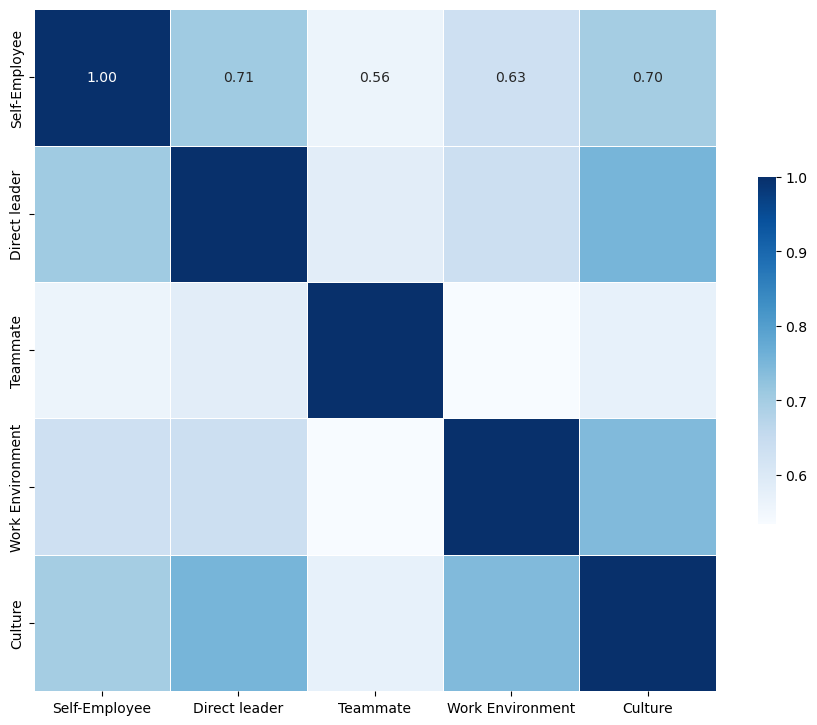

In [15]:
question_groups = {
    'Self-Employee': df_rating.columns[5:15],  # Questions 5-14
    'Direct leader': df_rating.columns[15:24],  # Questions 15-23
    'Teammate': df_rating.columns[24:29],       # Questions 24-28
    'Work Environment': df_rating.columns[29:33], # Questions 29-32
    'Culture': df_rating.columns[33:41],         # Questions 33-39
}

# Calculate the mean rating for each group per respondent
for group, questions in question_groups.items():
    df_rating[group] = df_rating[list(questions)].mean(axis=1)

# Now, select the mean ratings for each group
group_mean_ratings = df_rating[list(question_groups.keys())]

# Calculate the correlation matrix among these group mean ratings
group_correlation_matrix = group_mean_ratings.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(group_correlation_matrix, cmap='Blues', annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

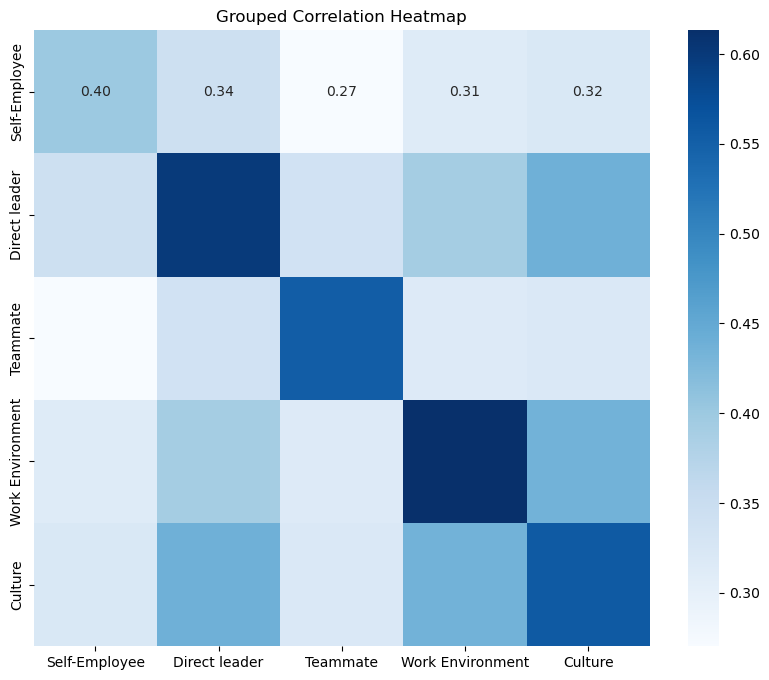

In [16]:
# Define the question groups with the actual question texts
question_groups = {
    'Self-Employee': df_rating.columns[5:15],  # Questions 5-14
    'Direct leader': df_rating.columns[15:24],  # Questions 15-23
    'Teammate': df_rating.columns[24:29],       # Questions 24-28
    'Work Environment': df_rating.columns[29:33], # Questions 29-32
    'Culture': df_rating.columns[33:41],         # Questions 33-39
}

# Calculate the correlation matrix for individual questions
correlation_matrix = df_rating[df_rating.columns[5:41]].corr()

# Initialize an empty DataFrame to store the average correlations by group
grouped_correlation = pd.DataFrame(index=question_groups.keys(), columns=question_groups.keys())

# Compute the average correlation for each group pair
for group1, questions1 in question_groups.items():
    for group2, questions2 in question_groups.items():
        # Select the relevant subset of the correlation matrix
        corr_subset = correlation_matrix.loc[questions1, questions2]
        # Calculate the mean of the correlations, excluding self-correlations for the diagonal
        mean_corr = corr_subset.mean().mean()
        grouped_correlation.loc[group1, group2] = mean_corr

# Convert the entries in the grouped correlation DataFrame to numeric type for the heatmap
grouped_correlation_numeric = grouped_correlation.apply(pd.to_numeric)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_correlation_numeric, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.title('Grouped Correlation Heatmap')
plt.show()

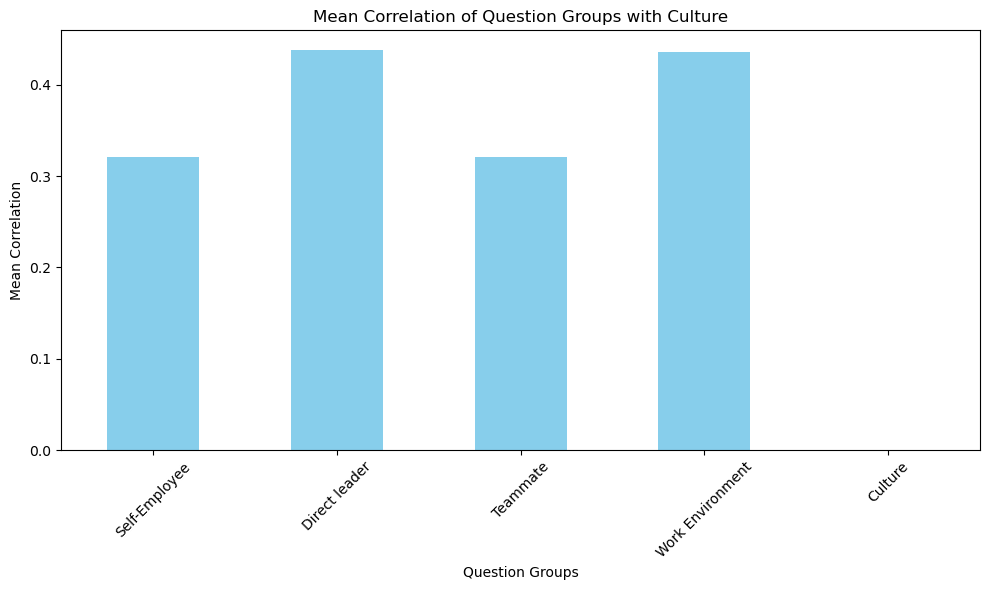

In [17]:
# Calculate the correlation matrix for individual questions
correlation_matrix = df_rating[df_rating.columns[5:41]].corr()

# Initialize an empty series to store the average correlation to 'Culture' for other categories
culture_correlation_means = pd.Series(index=question_groups.keys(), dtype=np.float64)

# Compute the average correlation to 'Culture' for each category
for group, questions in question_groups.items():
    if group != 'Culture':  # Exclude the 'Culture' group itself
        # Select the correlations between 'Culture' questions and the current group's questions
        corr_with_culture = correlation_matrix.loc[questions, question_groups['Culture']]
        # Take the mean of these correlations
        mean_correlation = corr_with_culture.mean().mean()
        culture_correlation_means[group] = mean_correlation

# Plotting the mean correlation values to 'Culture'
plt.figure(figsize=(10, 6))
culture_correlation_means.plot(kind='bar', color='skyblue')
plt.title('Mean Correlation of Question Groups with Culture')
plt.ylabel('Mean Correlation')
plt.xlabel('Question Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the x-axis labels
# plt.savefig('culture_correlation_bar_plot.png')  # Save the plot if needed
plt.show()

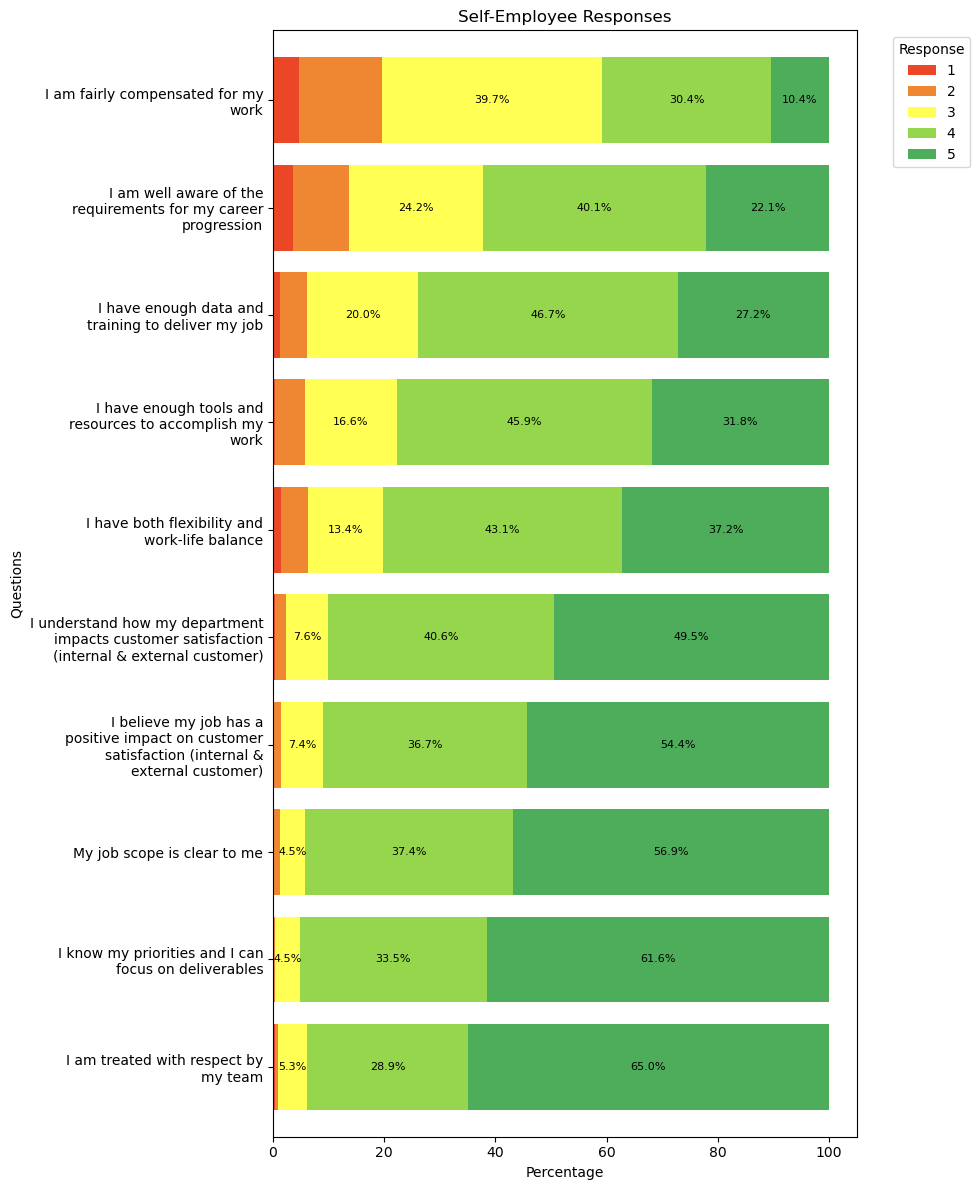

In [18]:
import textwrap

distribution_df = pd.DataFrame()

# Iterate through the specified columns for questions 1 to 9
for q_index in range(5, 15):  # Assuming columns 5 to 14 correspond to questions 1 to 9
    # Extract the responses for the question
    responses = df_rating.iloc[:, q_index]

    # Calculate the percentage distribution of responses
    distribution = responses.value_counts(normalize=True).sort_index() * 100
    distribution_df[df_rating.columns[q_index]] = distribution

# Transpose the DataFrame for plotting
distribution_df = distribution_df.T

# custom color scheme
my_color = list(islice(cycle(['#eb4726', '#ef8732', '#ffff54', '#96d64c', '#4ead5b']), None, len(distribution_df)))

# Sort the DataFrame based on the distribution of '5' answer
distribution_df.sort_values(by=5, ascending=False, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 1.2))
bars = distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)
responses_to_annotate = [3, 4, 5]

# Annotate each bar with the percentage value for responses 3, 4, and 5 only
for bar_container in bars.containers:
    # Each bar_container corresponds to one of the response categories
    for rect in bar_container:
        # Get width, height, and position data of the bar segment
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()
        
        # Get the index of the current bar_container to determine which response it corresponds to
        response_index = bars.containers.index(bar_container) + 1  # adding 1 because index starts from 0
        
        # Check if the current segment corresponds to responses 3, 4, or 5
        if response_index in responses_to_annotate:
            label_position = x + width/2  # Center the label horizontally in the bar segment
            if width > 0:  # If the segment is visible
                ax.text(label_position, y + height/2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
ax.set_yticklabels(['\n'.join(textwrap.wrap(label, 30)) for label in distribution_df.index])

plt.xlabel('Percentage')
plt.ylabel('Questions')
plt.title('Self-Employee Responses')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

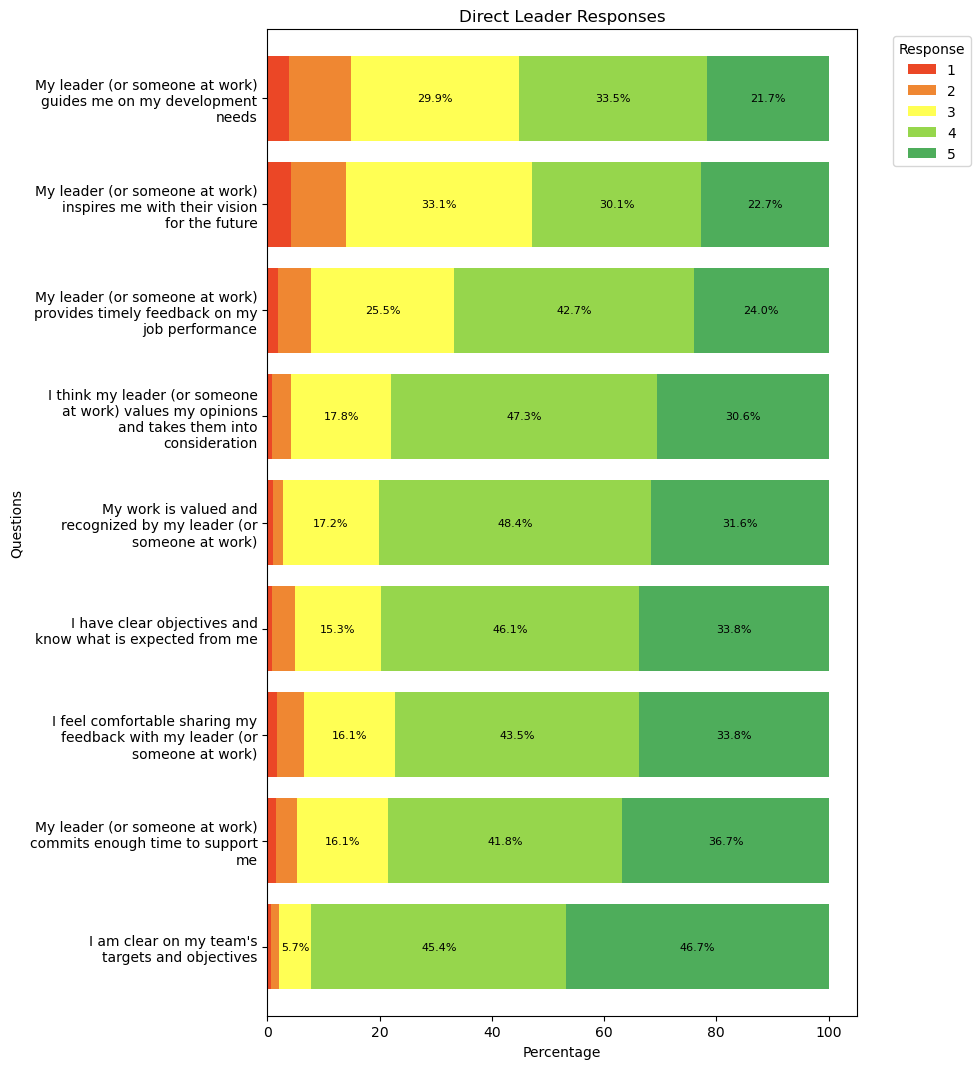

In [19]:
distribution_df = pd.DataFrame()

# Iterate through the specified columns for questions 1 to 9
for q_index in range(15, 24):  # Assuming columns 5 to 14 correspond to questions 1 to 9
    # Extract the responses for the question
    responses = df_rating.iloc[:, q_index]

    # Calculate the percentage distribution of responses
    distribution = responses.value_counts(normalize=True).sort_index() * 100
    distribution_df[df_rating.columns[q_index]] = distribution

# Transpose the DataFrame for plotting
distribution_df = distribution_df.T

# Sort the DataFrame based on the distribution of '5' answer
distribution_df.sort_values(by=5, ascending=False, inplace=True)

# custom color scheme
my_color = list(islice(cycle(['#eb4726', '#ef8732', '#ffff54', '#96d64c', '#4ead5b']), None, len(distribution_df)))

# Plotting
fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 1.2))
bars = distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)
responses_to_annotate = [3, 4, 5]

# Annotate each bar with the percentage value for responses 3, 4, and 5 only
for bar_container in bars.containers:
    # Each bar_container corresponds to one of the response categories
    for rect in bar_container:
        # Get width, height, and position data of the bar segment
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()
        
        # Get the index of the current bar_container to determine which response it corresponds to
        response_index = bars.containers.index(bar_container) + 1  # adding 1 because index starts from 0
        
        # Check if the current segment corresponds to responses 3, 4, or 5
        if response_index in responses_to_annotate:
            label_position = x + width/2  # Center the label horizontally in the bar segment
            if width > 0:  # If the segment is visible
                ax.text(label_position, y + height/2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
ax.set_yticklabels(['\n'.join(textwrap.wrap(label, 30)) for label in distribution_df.index])

plt.xlabel('Percentage')
plt.ylabel('Questions')
plt.title('Direct Leader Responses')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

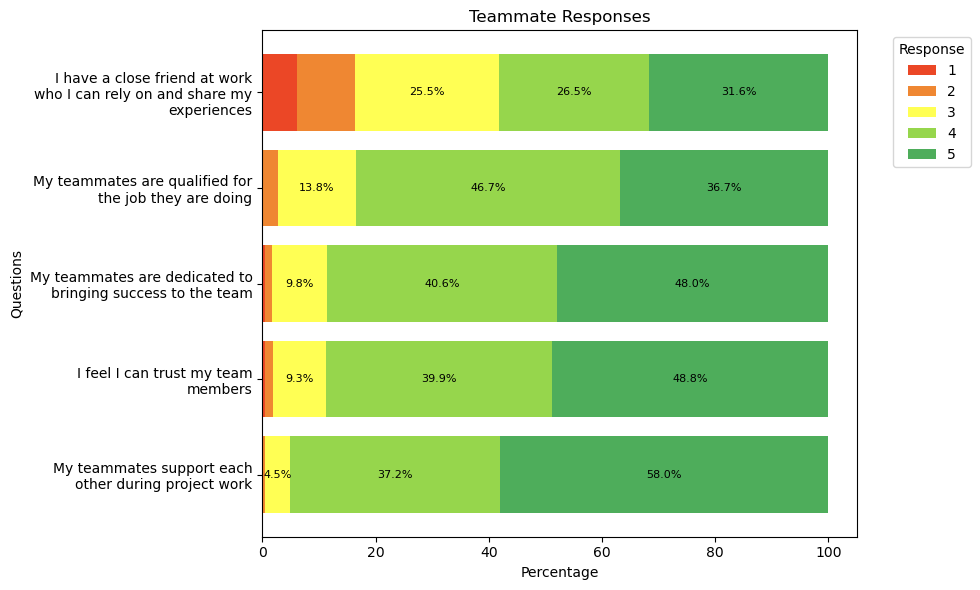

In [20]:
distribution_df = pd.DataFrame()

# Iterate through the specified columns for questions 1 to 9
for q_index in range(24, 29):  # Assuming columns 5 to 14 correspond to questions 1 to 9
    # Extract the responses for the question
    responses = df_rating.iloc[:, q_index]

    # Calculate the percentage distribution of responses
    distribution = responses.value_counts(normalize=True).sort_index() * 100
    distribution_df[df_rating.columns[q_index]] = distribution

# Transpose the DataFrame for plotting
distribution_df = distribution_df.T

# Sort the DataFrame based on the distribution of '5' answer
distribution_df.sort_values(by=5, ascending=False, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 1.2))
bars = distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)
responses_to_annotate = [3, 4, 5]

# Annotate each bar with the percentage value for responses 3, 4, and 5 only
for bar_container in bars.containers:
    # Each bar_container corresponds to one of the response categories
    for rect in bar_container:
        # Get width, height, and position data of the bar segment
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()
        
        # Get the index of the current bar_container to determine which response it corresponds to
        response_index = bars.containers.index(bar_container) + 1  # adding 1 because index starts from 0
        
        # Check if the current segment corresponds to responses 3, 4, or 5
        if response_index in responses_to_annotate:
            label_position = x + width/2  # Center the label horizontally in the bar segment
            if width > 0:  # If the segment is visible
                ax.text(label_position, y + height/2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
ax.set_yticklabels(['\n'.join(textwrap.wrap(label, 30)) for label in distribution_df.index])

plt.xlabel('Percentage')
plt.ylabel('Questions')
plt.title('Teammate Responses')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

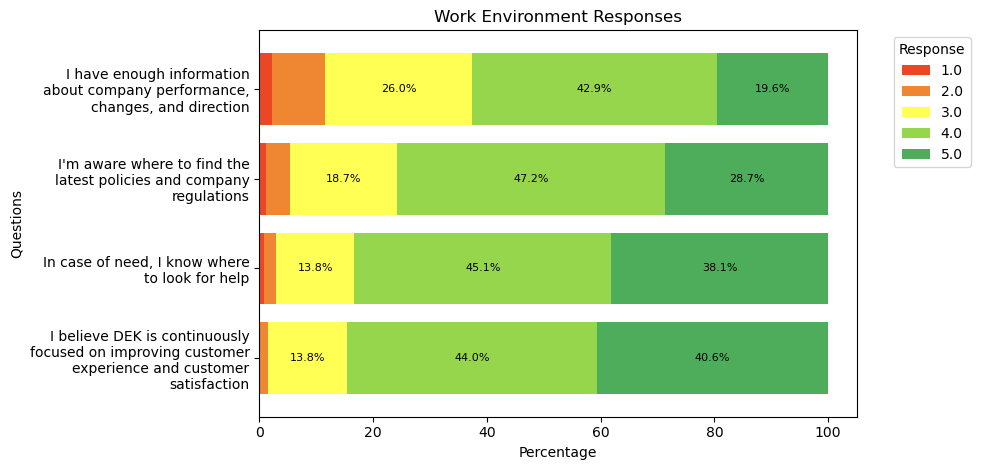

In [21]:
distribution_df = pd.DataFrame()

# Iterate through the specified columns for questions 1 to 9
for q_index in range(29, 33):  # Assuming columns 5 to 14 correspond to questions 1 to 9
    # Extract the responses for the question
    responses = df_rating.iloc[:, q_index]

    # Calculate the percentage distribution of responses
    distribution = responses.value_counts(normalize=True).sort_index() * 100
    distribution_df[df_rating.columns[q_index]] = distribution

# Transpose the DataFrame for plotting
distribution_df = distribution_df.T

# Sort the DataFrame based on the distribution of '5' answer
distribution_df.sort_values(by=5, ascending=False, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 1.2))
bars = distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)
responses_to_annotate = [3, 4, 5]

# Annotate each bar with the percentage value for responses 3, 4, and 5 only
for bar_container in bars.containers:
    # Each bar_container corresponds to one of the response categories
    for rect in bar_container:
        # Get width, height, and position data of the bar segment
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()
        
        # Get the index of the current bar_container to determine which response it corresponds to
        response_index = bars.containers.index(bar_container) + 1  # adding 1 because index starts from 0
        
        # Check if the current segment corresponds to responses 3, 4, or 5
        if response_index in responses_to_annotate:
            label_position = x + width/2  # Center the label horizontally in the bar segment
            if width > 0:  # If the segment is visible
                ax.text(label_position, y + height/2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
ax.set_yticklabels(['\n'.join(textwrap.wrap(label, 30)) for label in distribution_df.index])

plt.xlabel('Percentage')
plt.ylabel('Questions')
plt.title('Work Environment Responses')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

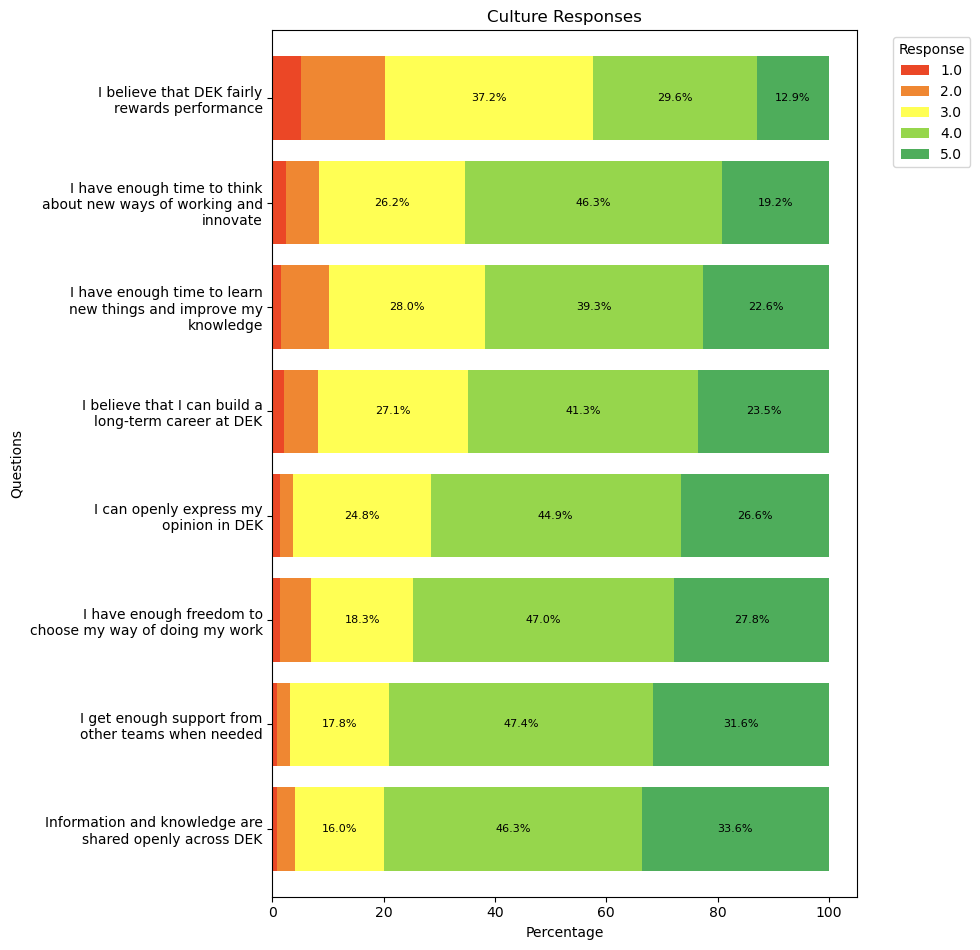

In [22]:
distribution_df = pd.DataFrame()

# Iterate through the specified columns for questions 1 to 9
for q_index in range(33, 41):  # Assuming columns 5 to 14 correspond to questions 1 to 9
    # Extract the responses for the question
    responses = df_rating.iloc[:, q_index]

    # Calculate the percentage distribution of responses
    distribution = responses.value_counts(normalize=True).sort_index() * 100
    distribution_df[df_rating.columns[q_index]] = distribution

# Transpose the DataFrame for plotting
distribution_df = distribution_df.T

# Sort the DataFrame based on the distribution of '5' answer
distribution_df.sort_values(by=5, ascending=False, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 1.2))
bars = distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)
responses_to_annotate = [3, 4, 5]

# Annotate each bar with the percentage value for responses 3, 4, and 5 only
for bar_container in bars.containers:
    # Each bar_container corresponds to one of the response categories
    for rect in bar_container:
        # Get width, height, and position data of the bar segment
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x()
        y = rect.get_y()
        
        # Get the index of the current bar_container to determine which response it corresponds to
        response_index = bars.containers.index(bar_container) + 1  # adding 1 because index starts from 0
        
        # Check if the current segment corresponds to responses 3, 4, or 5
        if response_index in responses_to_annotate:
            label_position = x + width/2  # Center the label horizontally in the bar segment
            if width > 0:  # If the segment is visible
                ax.text(label_position, y + height/2, f'{width:.1f}%', ha='center', va='center', fontsize=8)
ax.set_yticklabels(['\n'.join(textwrap.wrap(label, 30)) for label in distribution_df.index])

plt.xlabel('Percentage')
plt.ylabel('Questions')
plt.title('Culture Responses')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
# from scipy.stats import pearsonr

# question_groups = {
#     'Self-Employee': df_rating.columns[5:15],  # Questions 5-14
#     'Direct leader': df_rating.columns[15:24],  # Questions 15-23
#     'Teammate': df_rating.columns[24:29],       # Questions 24-28
#     'Work Environment': df_rating.columns[29:33], # Questions 29-32
#     'Culture': df_rating.columns[33:41],         # Questions 33-39
# }
# # Calculate the mean rating for each group per respondent
# for group, questions in question_groups.items():
#     df_rating[group] = df_rating[list(questions)].mean(axis=1)

# # Now, select the mean ratings for each group
# group_mean_ratings = df_rating[list(question_groups.keys())]

# # Prepare a dictionary to hold the correlation and p-values
# correlation_results = {'Group': [], 'Correlation': [], 'P-value': []}

# # Compute pairwise correlations and p-values
# for group in question_groups:
#     if group != 'Direct leader':
#         # Drop NaN values for the pair of groups being compared
#         valid_pairs = group_mean_ratings[['Direct leader', group]].dropna()

#         # Compute the correlation and p-value
#         corr, p_val = pearsonr(valid_pairs['Direct leader'], valid_pairs[group])
        
#         correlation_results['Group'].append(group)
#         correlation_results['Correlation'].append(corr)
#         correlation_results['P-value'].append(p_val)

# # Convert the results to a DataFrame
# correlation_results_df = pd.DataFrame(correlation_results)

# correlation_results_df

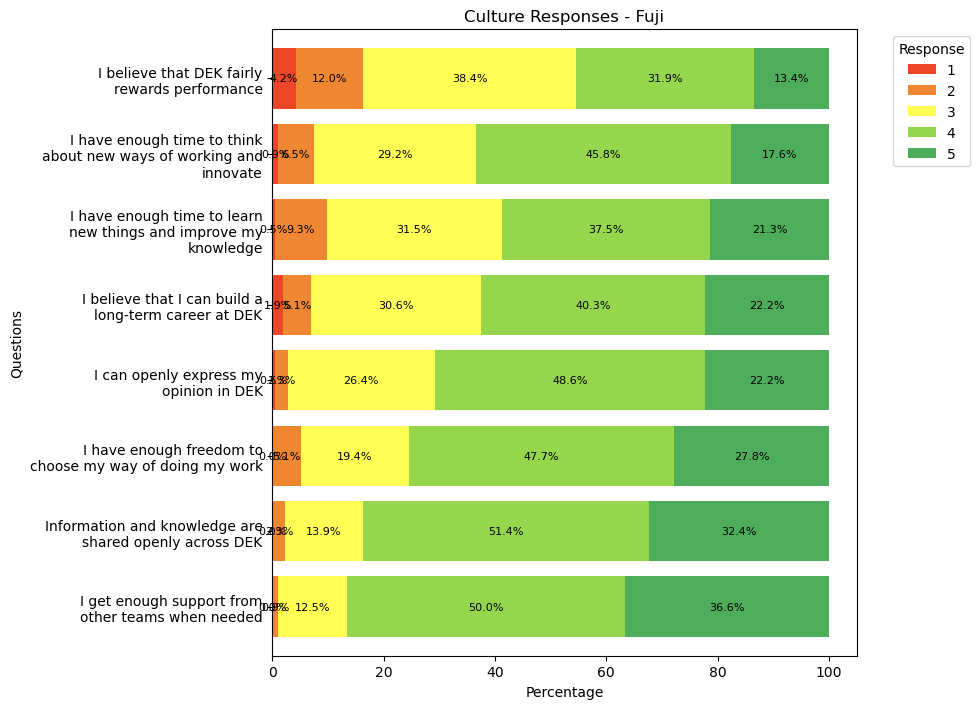

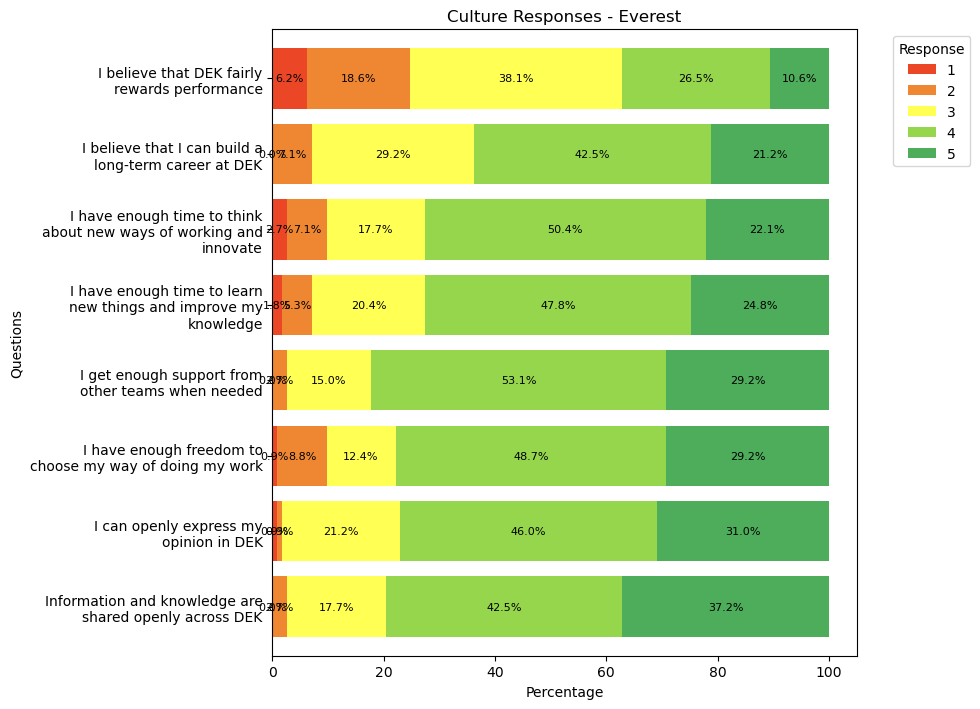

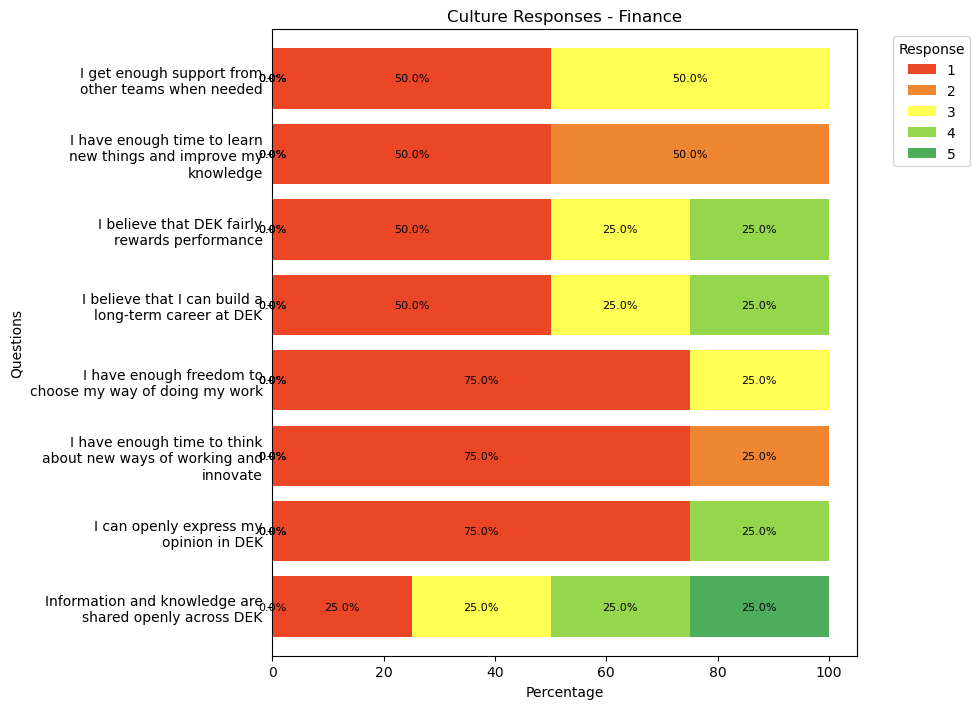

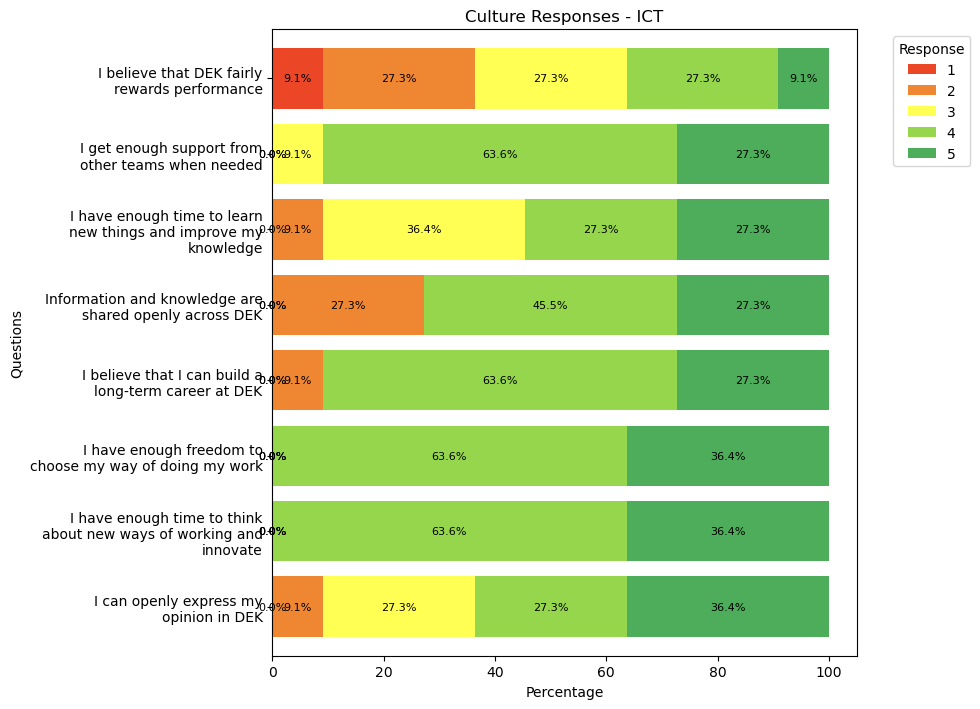

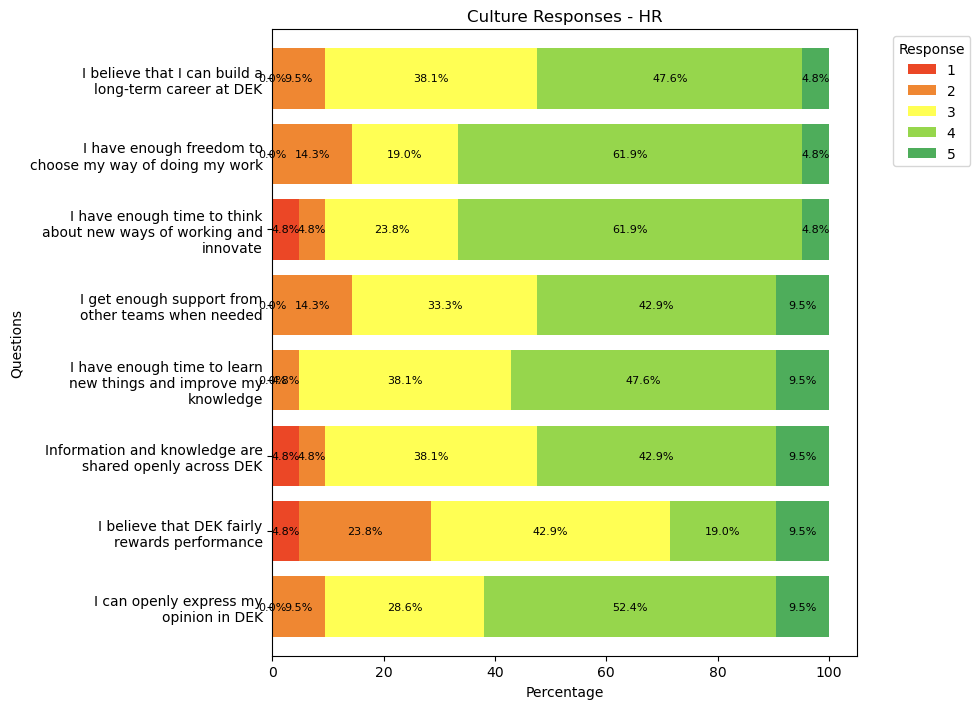

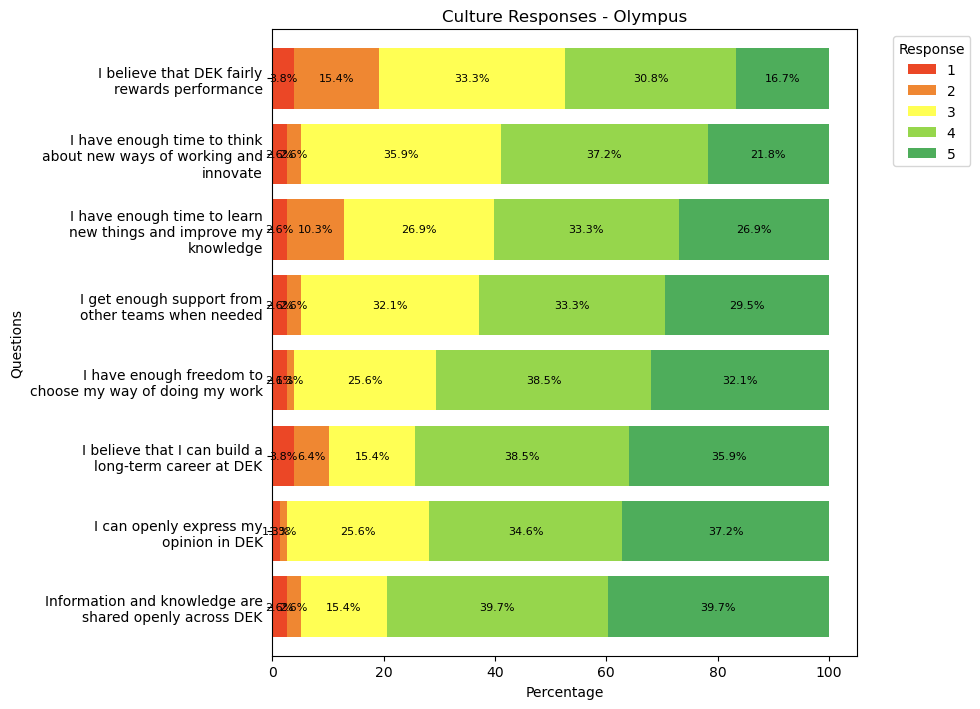

In [24]:
# Define the color palette only once, outside of the loop
palette = sns.color_palette('viridis', 5)

# Get the unique departments
departments = df_rating['Department'].unique()

# Define the question range for the 'Culture' questions
question_range = range(33, 41)  # Adjust if necessary

# Iterate through each department
for department in departments:
    distribution_df = pd.DataFrame()
    df_dept = df_rating[df_rating['Department'] == department]

    # Iterate through the question range
    for q_index in question_range:
        responses = df_dept.iloc[:, q_index]
        # Reindex the distribution to ensure all categories are present
        distribution = responses.value_counts(normalize=True).reindex(range(1, 6), fill_value=0) * 100
        distribution_df[df_rating.columns[q_index]] = distribution

    # Transpose and sort by '5' response for plotting
    distribution_df = distribution_df.T.sort_values(by=5, ascending=False)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 0.9))
    distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)

    # Annotate each bar segment with the percentage value
    for bar_container in ax.containers:
        ax.bar_label(bar_container, fmt='%.1f%%', label_type='center', fontsize=8)
        
    # Set y-tick labels
    ax.set_yticklabels(['\n'.join(textwrap.wrap(label.get_text(), 30)) for label in ax.get_yticklabels()])

    plt.xlabel('Percentage')
    plt.ylabel('Questions')
    plt.title(f'Culture Responses - {department}')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

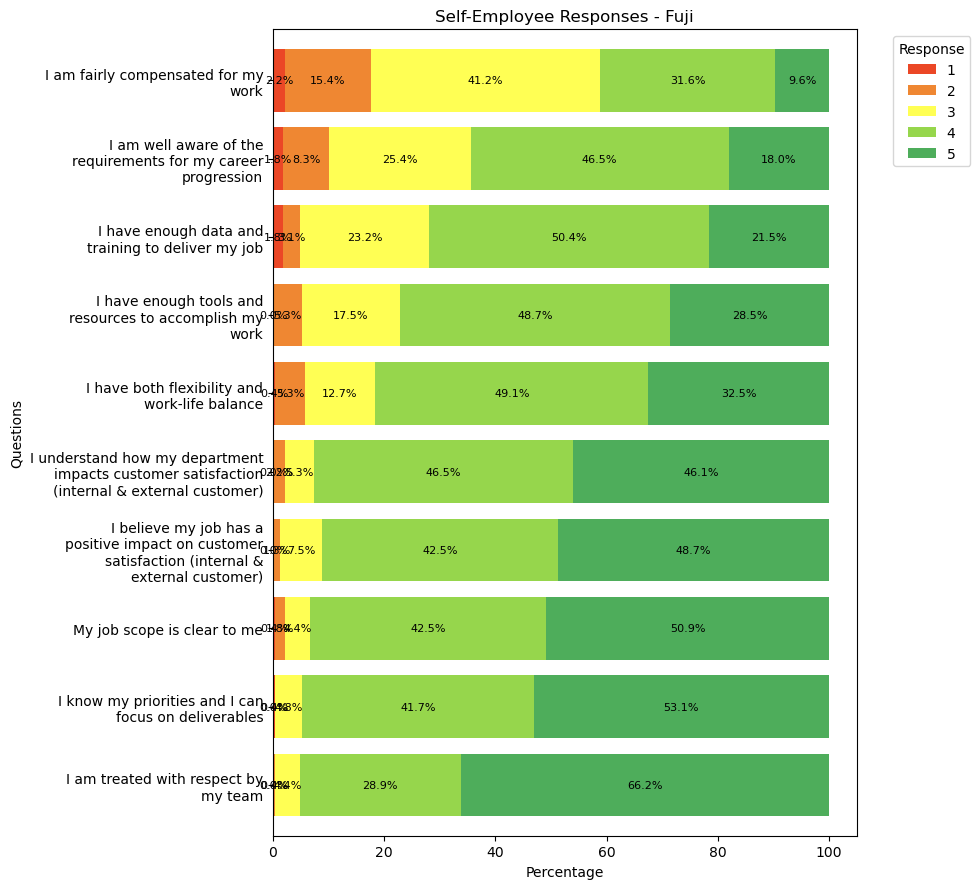

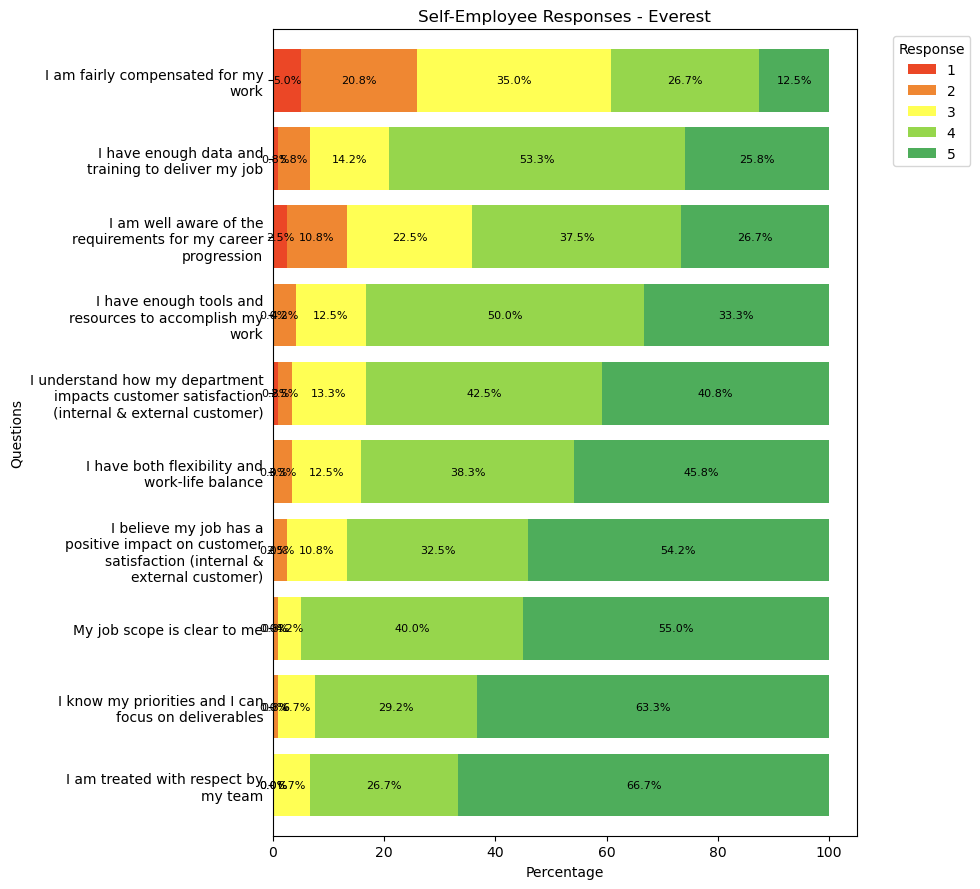

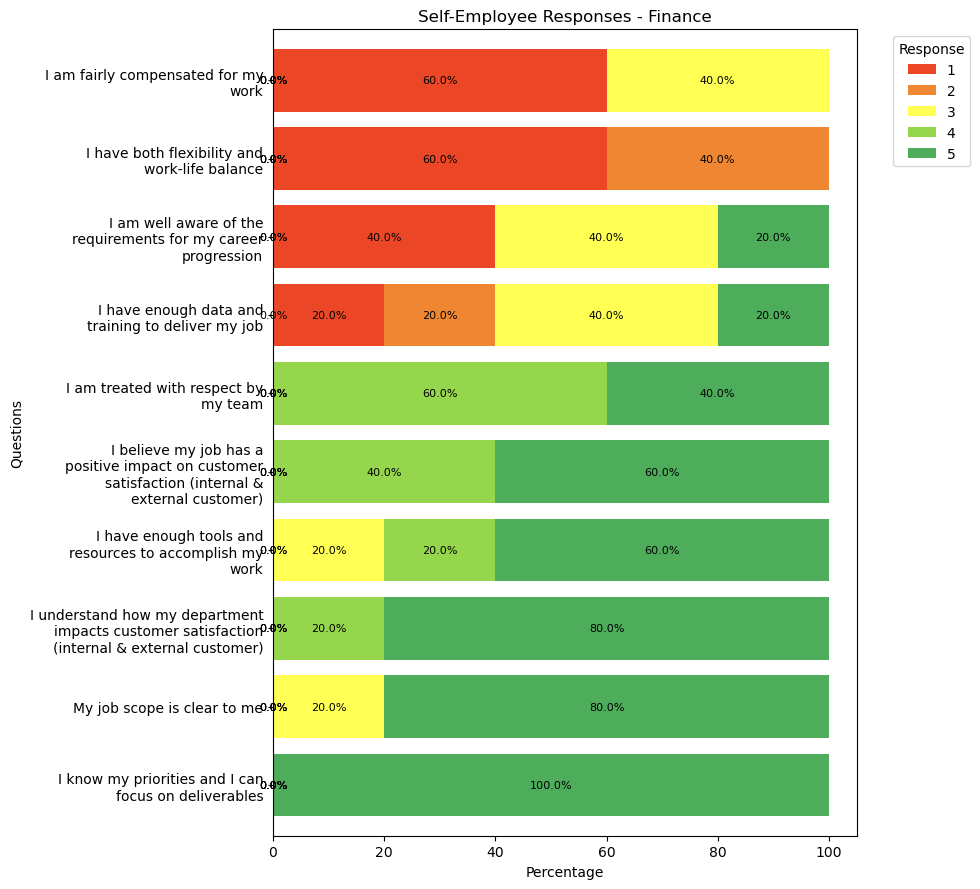

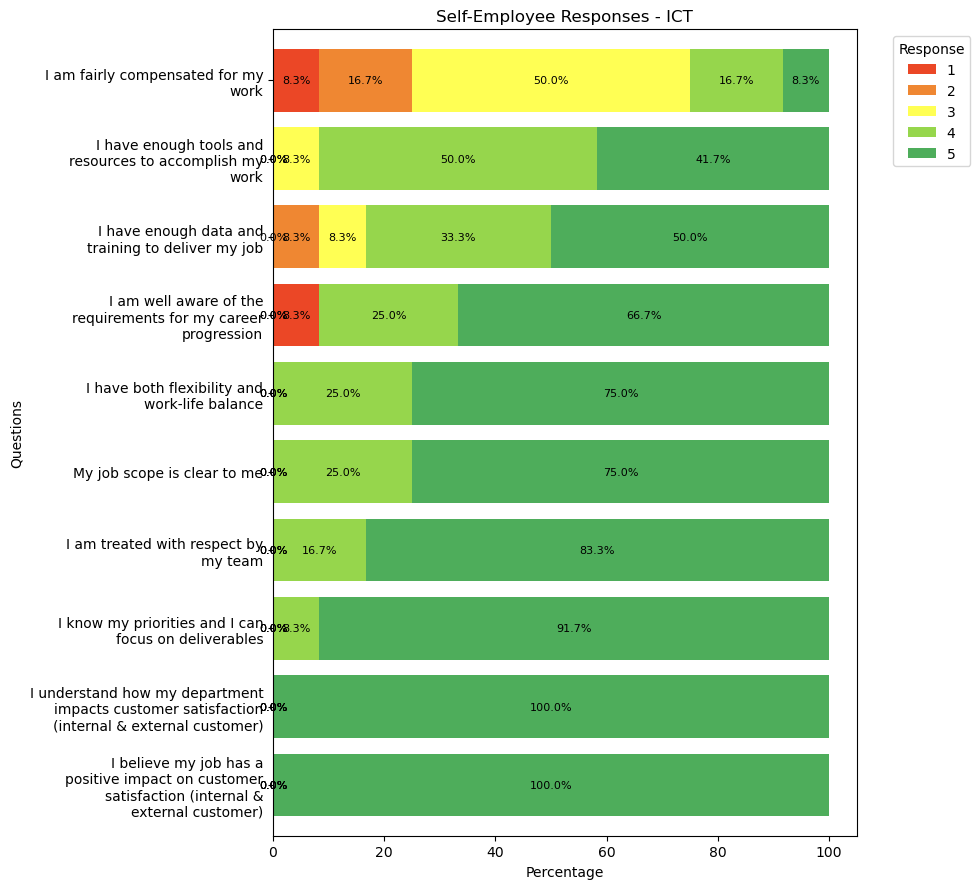

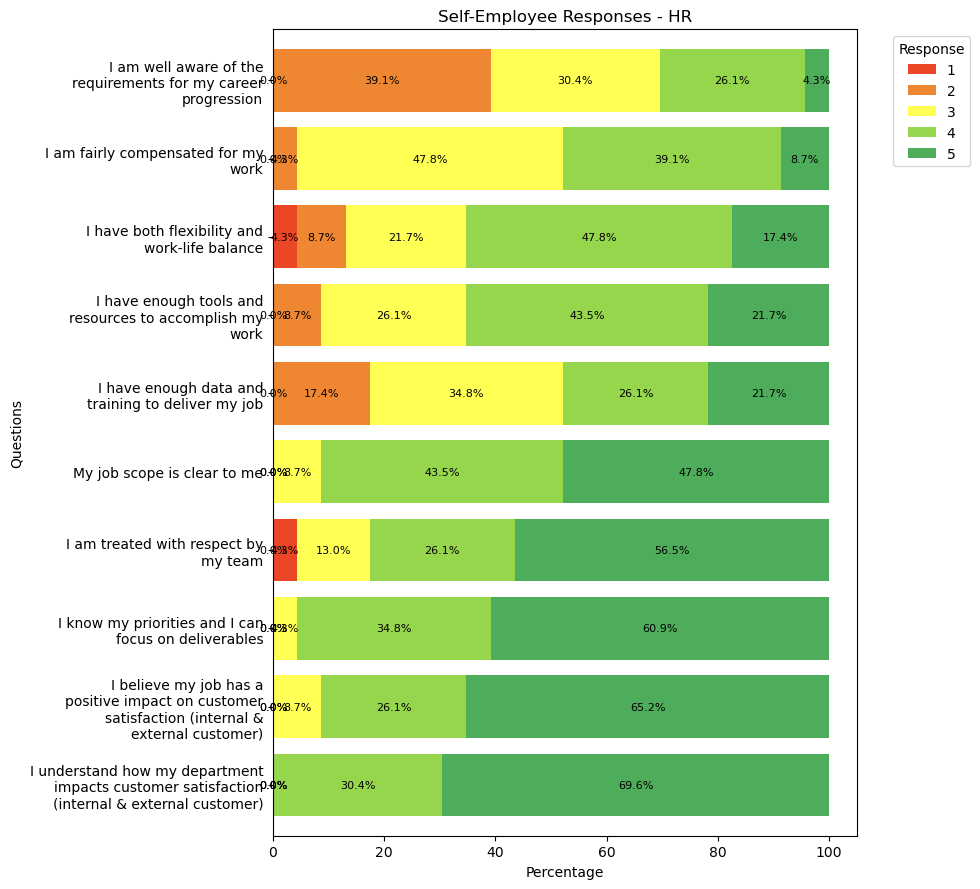

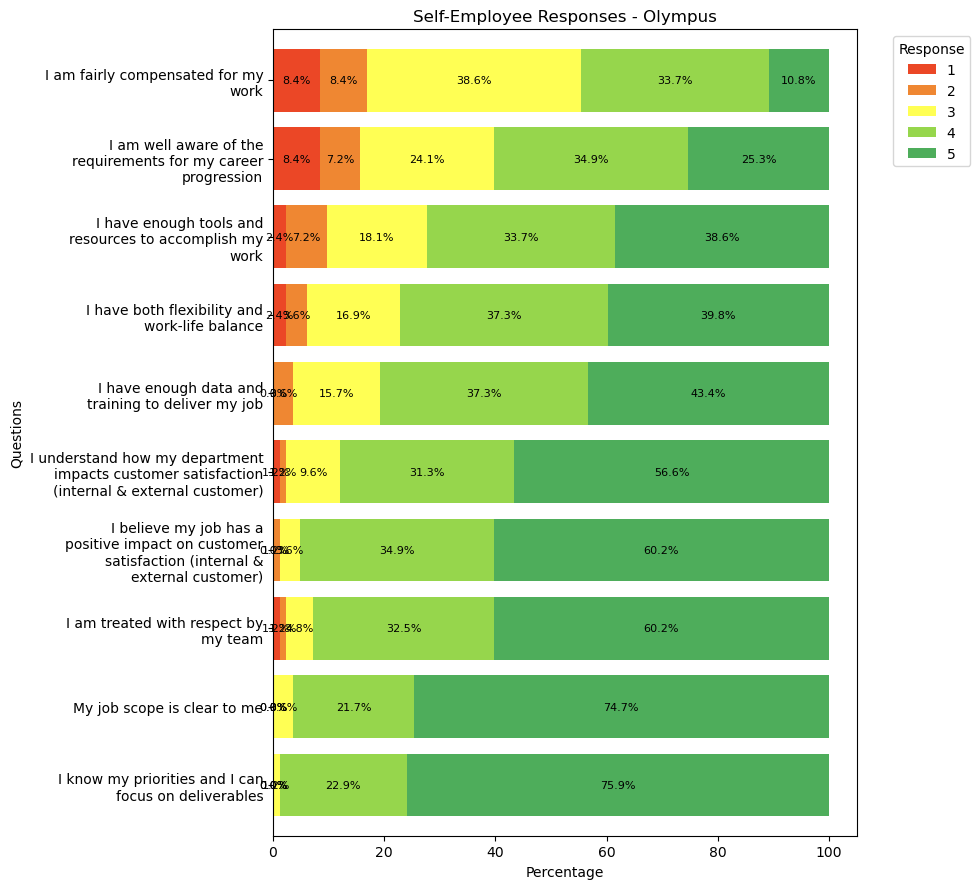

In [25]:
# Define the color palette only once, outside of the loop
palette = sns.color_palette('viridis', 5)

# Get the unique departments
departments = df_rating['Department'].unique()

# Define the question range for the 'Culture' questions
question_range = range(5, 15)  # Adjust if necessary

# Iterate through each department
for department in departments:
    distribution_df = pd.DataFrame()
    df_dept = df_rating[df_rating['Department'] == department]

    # Iterate through the question range
    for q_index in question_range:
        responses = df_dept.iloc[:, q_index]
        # Reindex the distribution to ensure all categories are present
        distribution = responses.value_counts(normalize=True).reindex(range(1, 6), fill_value=0) * 100
        distribution_df[df_rating.columns[q_index]] = distribution

    # Transpose and sort by '5' response for plotting
    distribution_df = distribution_df.T.sort_values(by=5, ascending=False)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 0.9))
    distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)

    # Annotate each bar segment with the percentage value
    for bar_container in ax.containers:
        ax.bar_label(bar_container, fmt='%.1f%%', label_type='center', fontsize=8)
        
    # Set y-tick labels
    ax.set_yticklabels(['\n'.join(textwrap.wrap(label.get_text(), 30)) for label in ax.get_yticklabels()])

    plt.xlabel('Percentage')
    plt.ylabel('Questions')
    plt.title(f'Self-Employee Responses - {department}')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

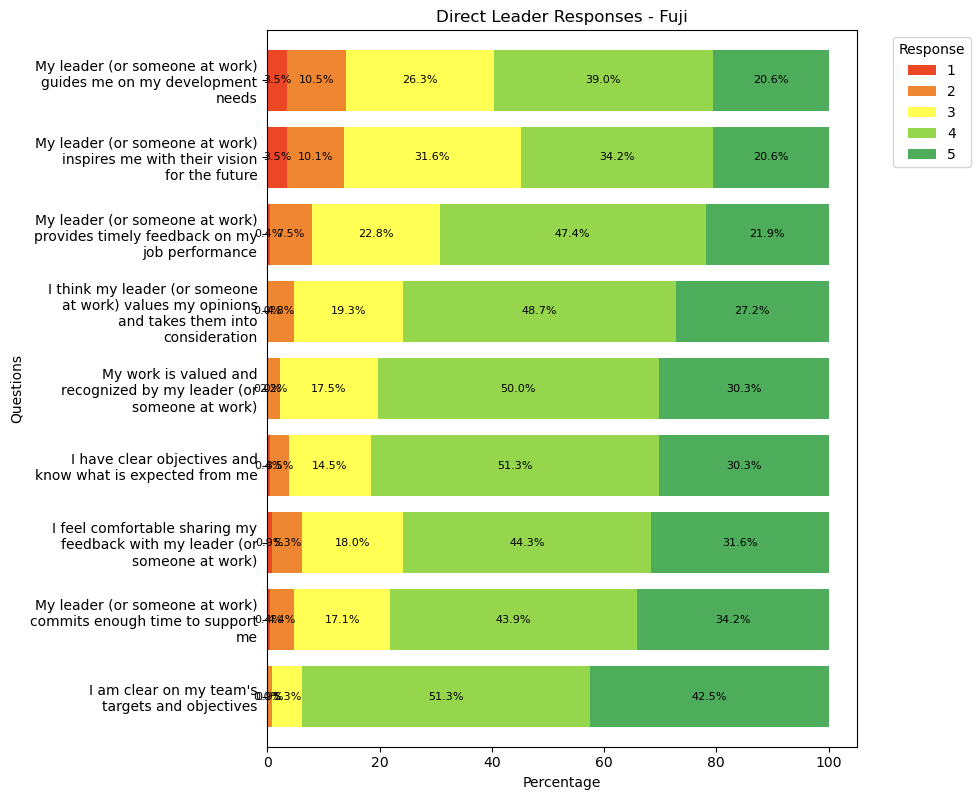

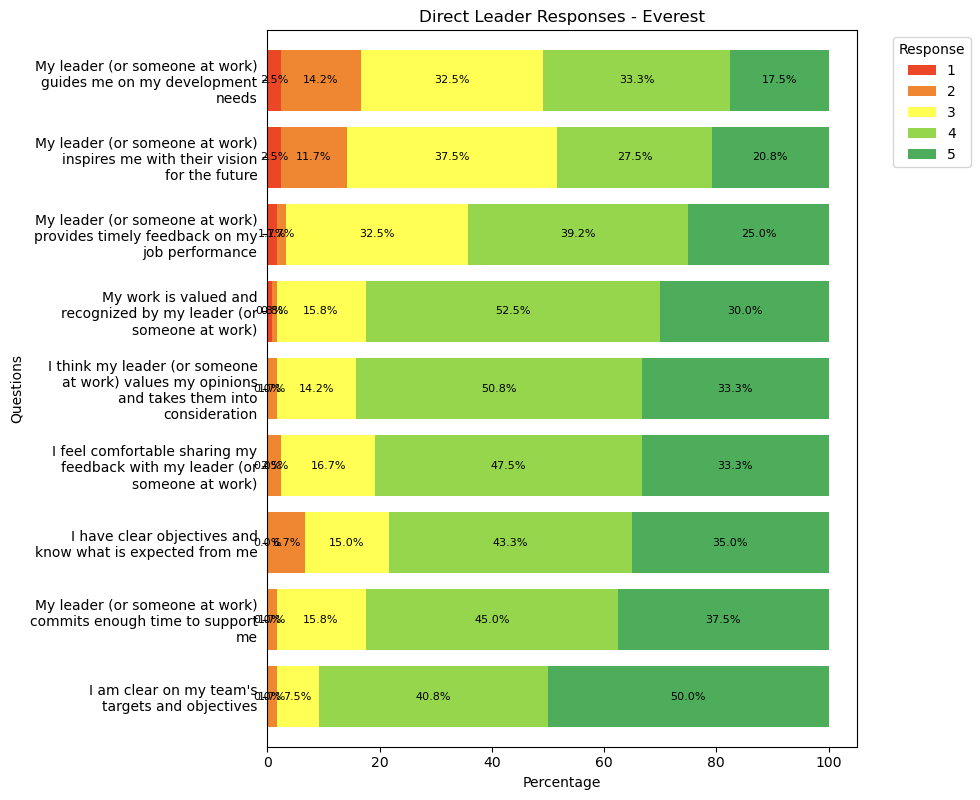

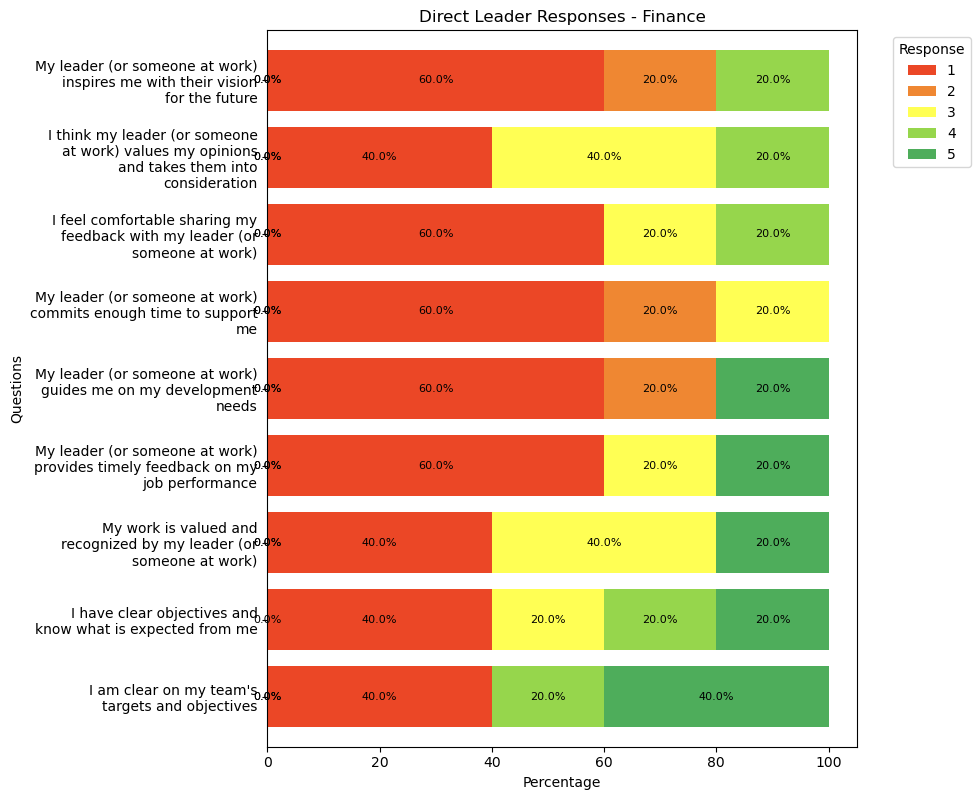

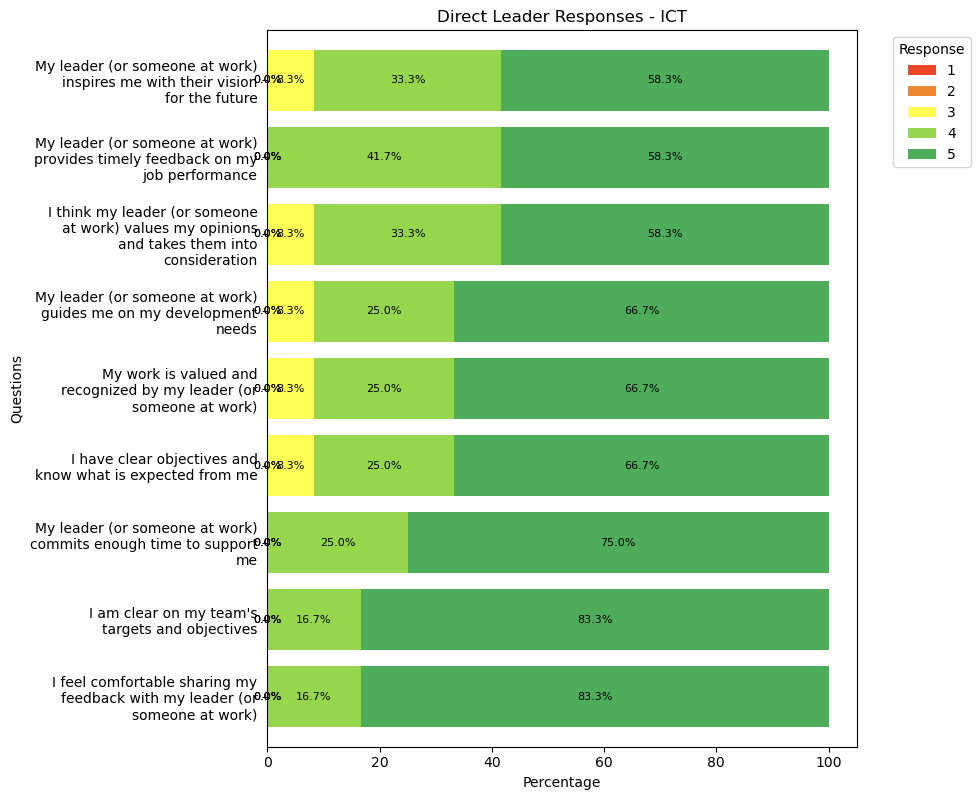

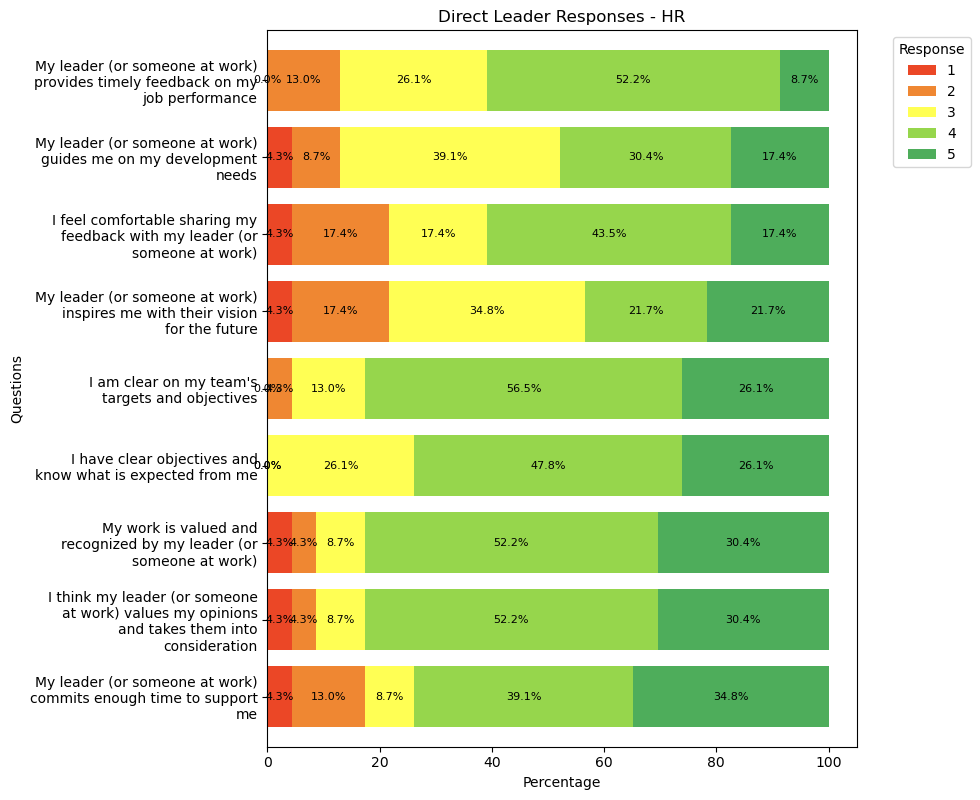

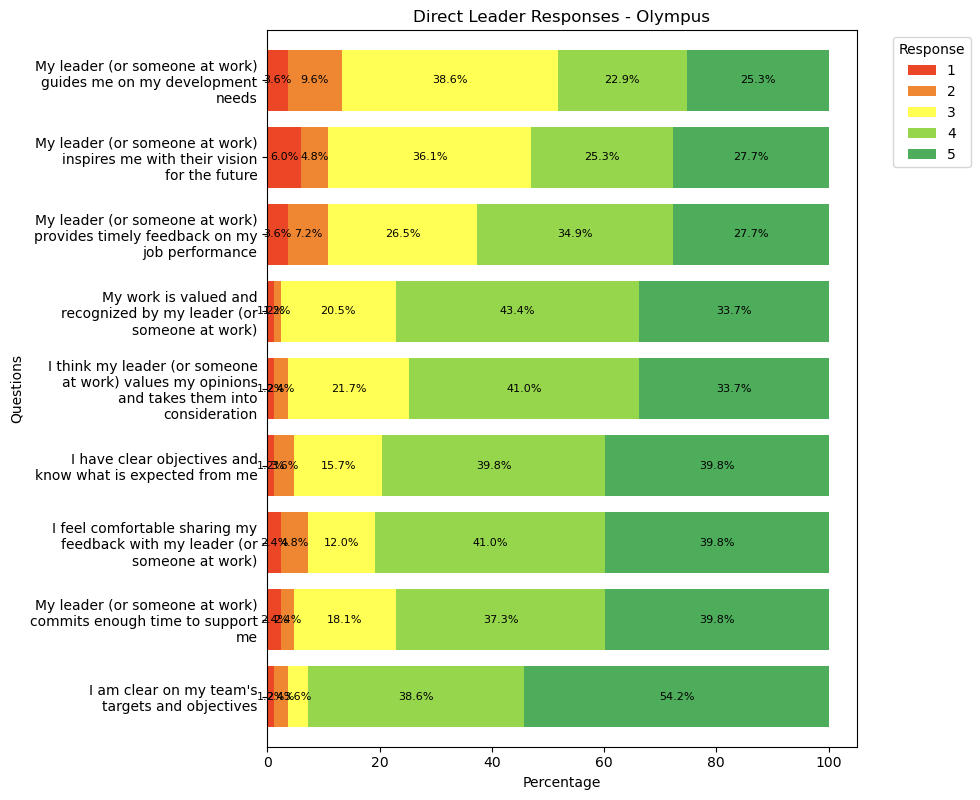

In [26]:
# Define the color palette only once, outside of the loop
palette = sns.color_palette('viridis', 5)

# Get the unique departments
departments = df_rating['Department'].unique()

# Define the question range for the 'Culture' questions
question_range = range(15, 24)  # Adjust if necessary

# Iterate through each department
for department in departments:
    distribution_df = pd.DataFrame()
    df_dept = df_rating[df_rating['Department'] == department]

    # Iterate through the question range
    for q_index in question_range:
        responses = df_dept.iloc[:, q_index]
        # Reindex the distribution to ensure all categories are present
        distribution = responses.value_counts(normalize=True).reindex(range(1, 6), fill_value=0) * 100
        distribution_df[df_rating.columns[q_index]] = distribution

    # Transpose and sort by '5' response for plotting
    distribution_df = distribution_df.T.sort_values(by=5, ascending=False)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 0.9))
    distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)

    # Annotate each bar segment with the percentage value
    for bar_container in ax.containers:
        ax.bar_label(bar_container, fmt='%.1f%%', label_type='center', fontsize=8)
        
    # Set y-tick labels
    ax.set_yticklabels(['\n'.join(textwrap.wrap(label.get_text(), 30)) for label in ax.get_yticklabels()])

    plt.xlabel('Percentage')
    plt.ylabel('Questions')
    plt.title(f'Direct Leader Responses - {department}')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

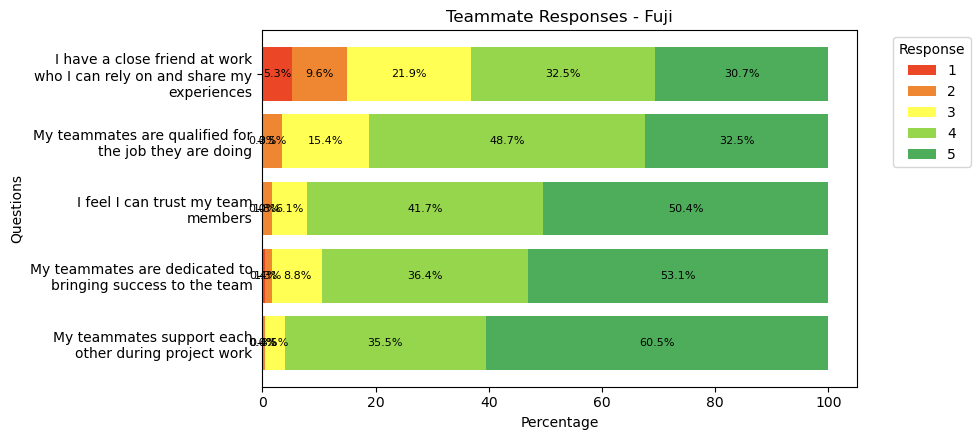

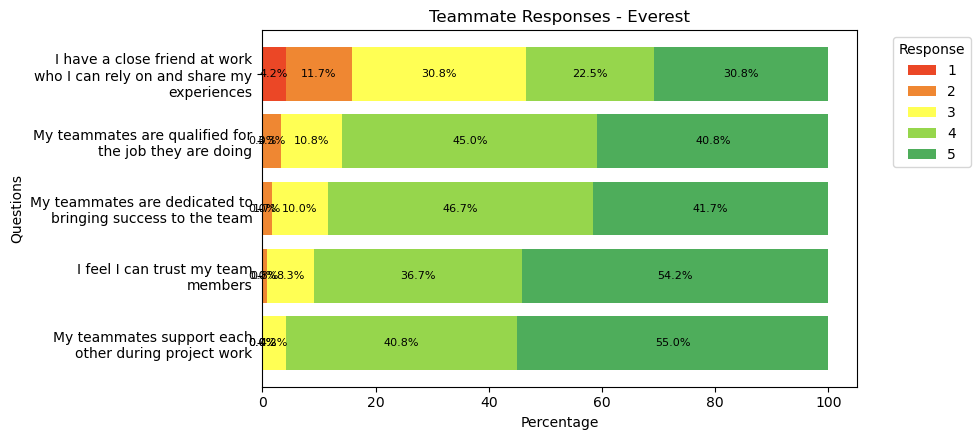

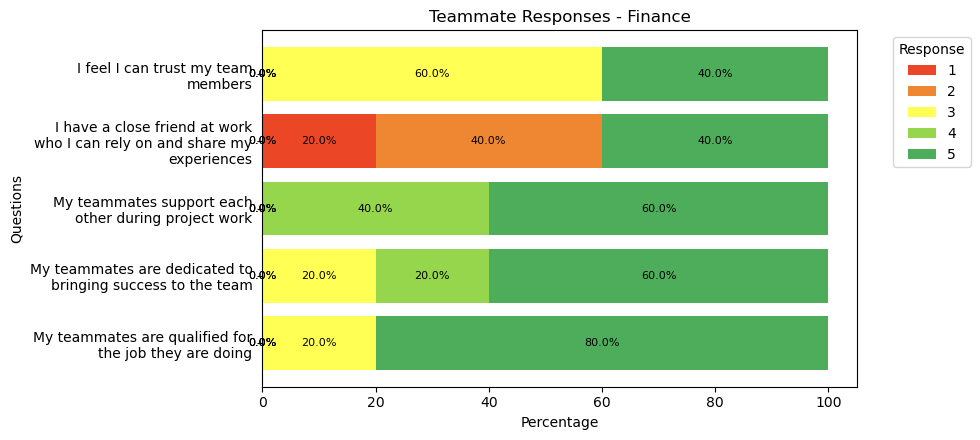

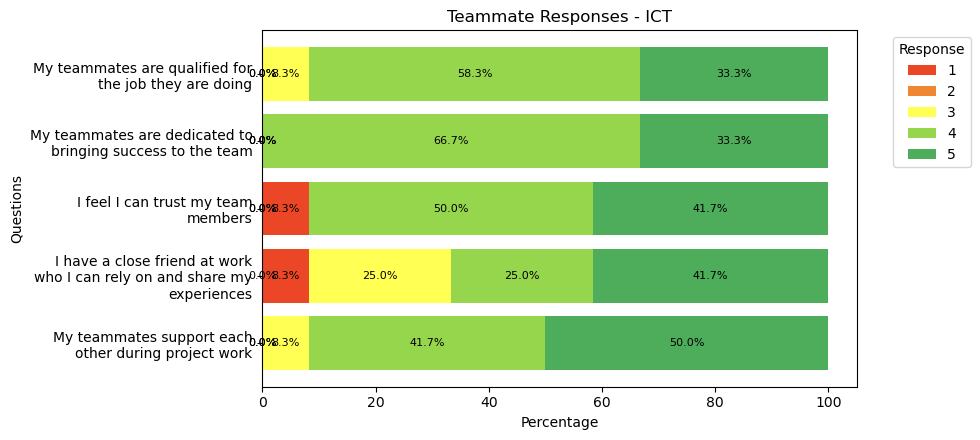

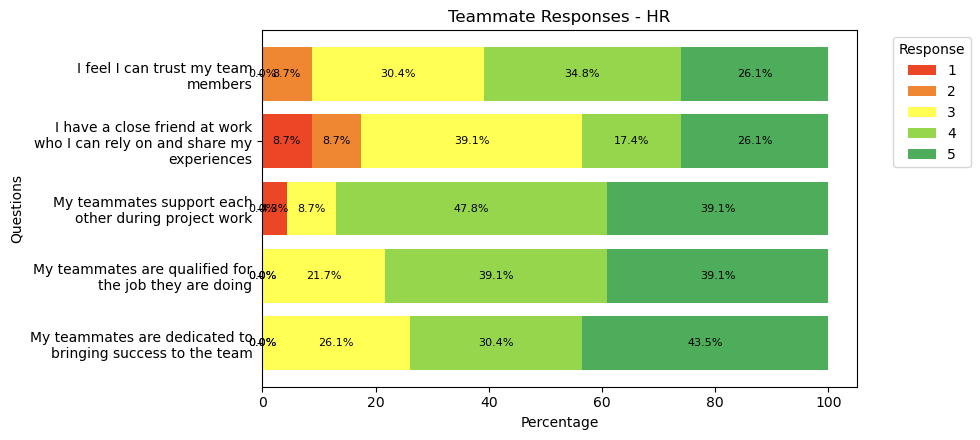

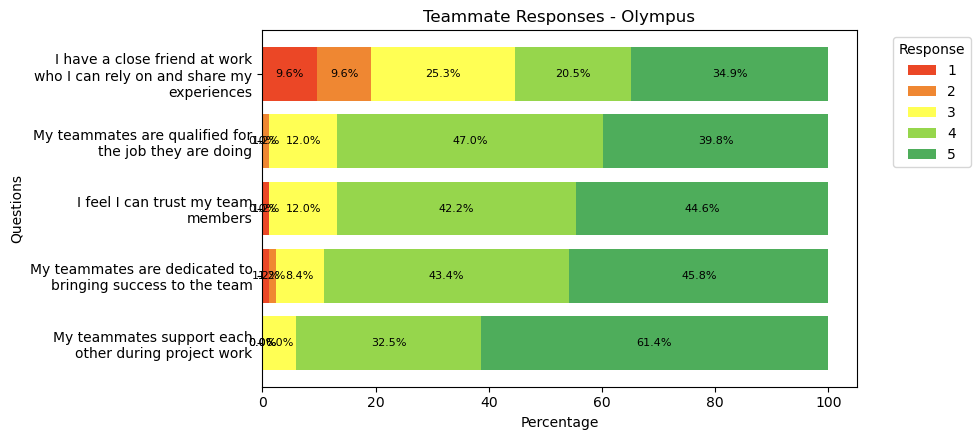

In [27]:
# Define the color palette only once, outside of the loop
palette = sns.color_palette('viridis', 5)

# Get the unique departments
departments = df_rating['Department'].unique()

# Define the question range for the 'Culture' questions
question_range = range(24, 29)  # Adjust if necessary

# Iterate through each department
for department in departments:
    distribution_df = pd.DataFrame()
    df_dept = df_rating[df_rating['Department'] == department]

    # Iterate through the question range
    for q_index in question_range:
        responses = df_dept.iloc[:, q_index]
        # Reindex the distribution to ensure all categories are present
        distribution = responses.value_counts(normalize=True).reindex(range(1, 6), fill_value=0) * 100
        distribution_df[df_rating.columns[q_index]] = distribution

    # Transpose and sort by '5' response for plotting
    distribution_df = distribution_df.T.sort_values(by=5, ascending=False)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 0.9))
    distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)

    # Annotate each bar segment with the percentage value
    for bar_container in ax.containers:
        ax.bar_label(bar_container, fmt='%.1f%%', label_type='center', fontsize=8)
        
    # Set y-tick labels
    ax.set_yticklabels(['\n'.join(textwrap.wrap(label.get_text(), 30)) for label in ax.get_yticklabels()])

    plt.xlabel('Percentage')
    plt.ylabel('Questions')
    plt.title(f'Teammate Responses - {department}')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

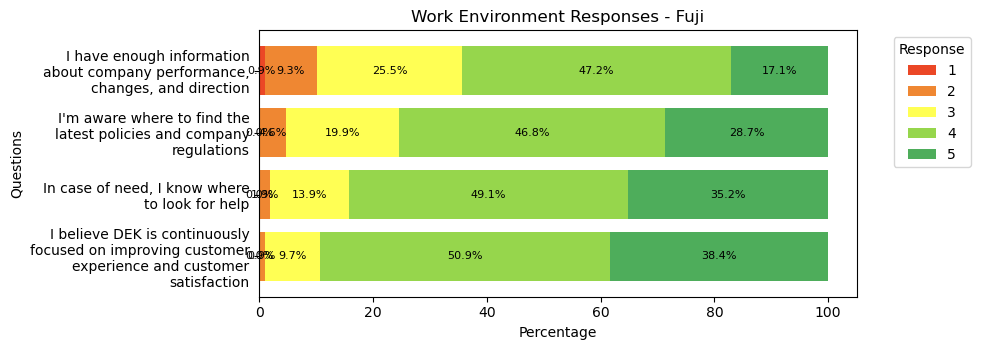

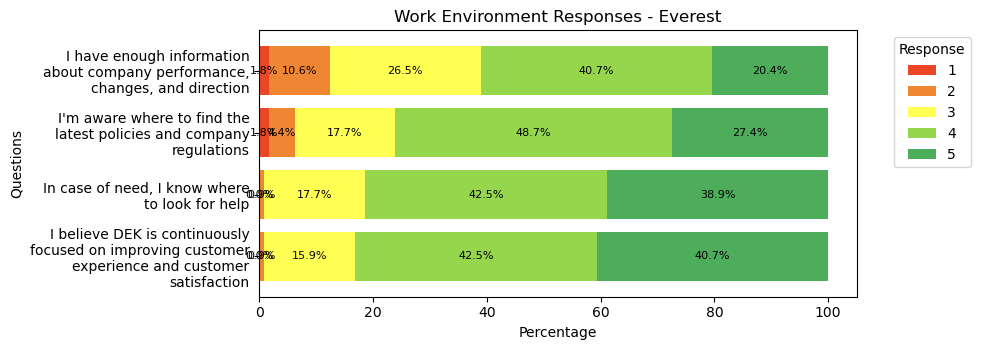

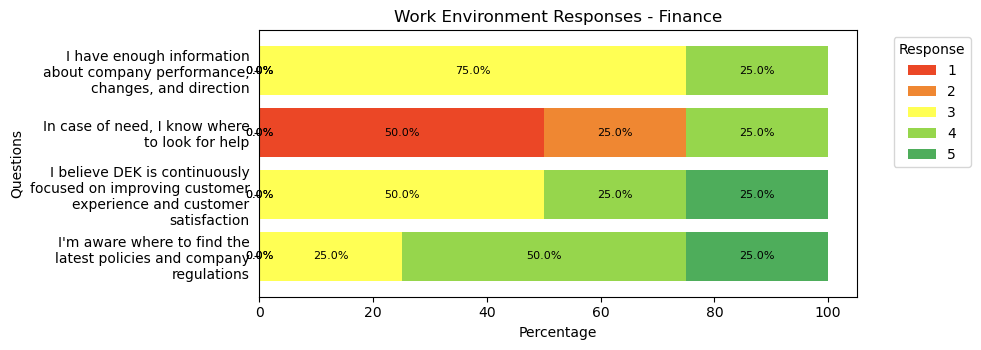

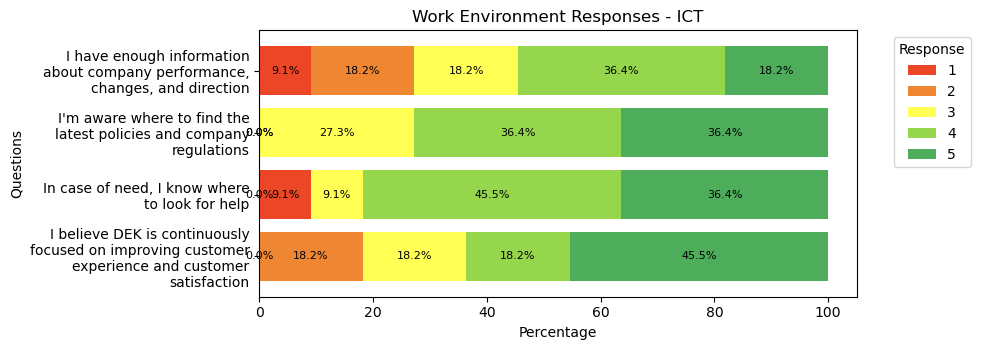

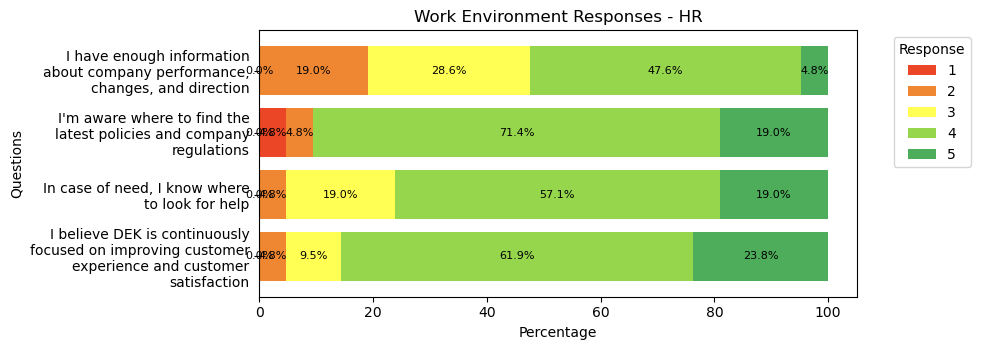

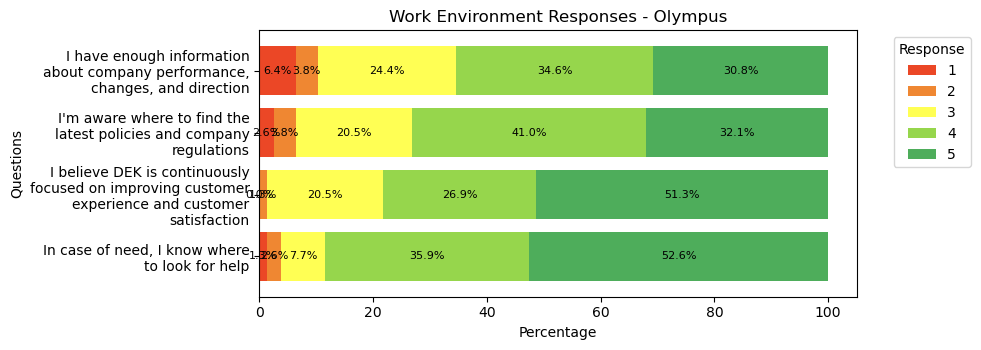

In [28]:
# Define the color palette only once, outside of the loop
palette = sns.color_palette('viridis', 5)

# Get the unique departments
departments = df_rating['Department'].unique()

# Define the question range for the 'Culture' questions
question_range = range(29, 33)  # Adjust if necessary

# Iterate through each department
for department in departments:
    distribution_df = pd.DataFrame()
    df_dept = df_rating[df_rating['Department'] == department]

    # Iterate through the question range
    for q_index in question_range:
        responses = df_dept.iloc[:, q_index]
        # Reindex the distribution to ensure all categories are present
        distribution = responses.value_counts(normalize=True).reindex(range(1, 6), fill_value=0) * 100
        distribution_df[df_rating.columns[q_index]] = distribution

    # Transpose and sort by '5' response for plotting
    distribution_df = distribution_df.T.sort_values(by=5, ascending=False)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, len(distribution_df) * 0.9))
    distribution_df.plot(kind='barh', stacked=True, width=0.8, ax=ax, color=my_color)

    # Annotate each bar segment with the percentage value
    for bar_container in ax.containers:
        ax.bar_label(bar_container, fmt='%.1f%%', label_type='center', fontsize=8)
        
    # Set y-tick labels
    ax.set_yticklabels(['\n'.join(textwrap.wrap(label.get_text(), 30)) for label in ax.get_yticklabels()])

    plt.xlabel('Percentage')
    plt.ylabel('Questions')
    plt.title(f'Work Environment Responses - {department}')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()